<a href="https://colab.research.google.com/github/soleildeminuit/AI-Samhallsplanering-Course/blob/main/scripts/AI_Samhallsplanering_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pip Install Packages

In [ ]:
!pip install rasterio
!pip install geopandas
!pip install requests


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 32.4 MB/s eta 0:00:00


# Hämta geodata

***Här är den första textcellen***

In [ ]:
import requests
import zipfile
import io
import os

# Lista med URLs för de filer som ska laddas ner
urls = [
    "https://www.scb.se/contentassets/3443fea3fa6640f7a57ea15d9a372d33/shape_svenska_220223.zip",
    "https://www.scb.se/contentassets/923c3627a8a042a5b9215e8ff3bde0a3/deso_2018_2021-10-21.zip",
    "https://www.scb.se/contentassets/e3b2f06da62046ba93ff58af1b845c7e/regso_2018_v2.zip"
]

# Skapa katalogen för att spara nerladdade filer
os.makedirs('/content/sample_data/geodata', exist_ok=True)

for url in urls:
    response = requests.get(url)

    # Extrahera ZIP-filen
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_file:
        zip_file.extractall('/content/sample_data/geodata')

        # Extrahera alla inre ZIP-filer
        for file in zip_file.namelist():
            if file.endswith('.zip'):
                with zipfile.ZipFile(io.BytesIO(zip_file.read(file))) as inner_zip_file:
                    inner_zip_file.extractall('/content/sample_data/geodata')


In [ ]:
# !pip install geopandas
# !pip install descartes
# import geopandas as gpd
# import matplotlib.pyplot as plt

# # Ladda ner shape-filen
# !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Kommun_Sweref99TM_region.shp

# # Läs in shape-filen
# try:
#     shapefile = gpd.read_file("Kommun_Sweref99TM_region.shp")
# except ValueError:
#     # Ladda ner filerna som saknas
#     !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Kommun_Sweref99TM_region.cpg
#     !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Kommun_Sweref99TM_region.dbf
#     !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Kommun_Sweref99TM_region.prj
#     !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Kommun_Sweref99TM_region.shx
#     #
#     !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Lan_Sweref99TM_region.cpg
#     !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Lan_Sweref99TM_region.dbf
#     !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Lan_Sweref99TM_region.prj
#     !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Lan_Sweref99TM_region.shx
#     #
#     !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/DeSO_2018_v2.gpkg
#     !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/RegSO_2018_v2.gpkg

#     shapefile = gpd.read_file("Kommun_Sweref99TM_region.shp")

# # Rita kartan
# shapefile.plot()
# plt.show()


# Hämta rasterdata

# Ladda filer lokalt i Colab

In [ ]:
import requests
from io import BytesIO
import rasterio
import geopandas as gpd

# Lista med filnamn i katalogen
filnamn_lista = ["Stockholm_2017_2022.tif",
                 "Forskolor_ht23_sweref.gpkg",
                 "N_lan_nmd2018bas_ogeneraliserad_v1_1.tif.qml",
                 "tradtackning_binar3m_Örebro.tif",
                 "N_lan_nmd2018bas_ogeneraliserad_v1_1.tif"]  # Uppdatera med faktiska filnamn

# Bas-URL för GitHub-repot
base_url = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/'

for filnamn in filnamn_lista:
    url = base_url + filnamn

    # Ladda ner filen
    response = requests.get(url)
    response.raise_for_status()

    # Spara filen lokalt i Colab
    file_path = f'/content/sample_data/{filnamn}'
    with open(file_path, 'wb') as file:
        file.write(response.content)

    # Kontrollera filtyp och läs in data därefter
    if filnamn.endswith('.tif'):
        # Läs in rasterdata (GeoTIFF) med rasterio
        with rasterio.open(file_path) as src:
            raster_data = src.read(1)
            # Hantera rasterdata här...

    elif filnamn.endswith('.gpkg'):
        # Läs in vektordata (GeoPackage) med geopandas
        vector_data = gpd.read_file(file_path)
        # Hantera vektordata här...

    else:
        print(f'Filformat för {filnamn} stöds inte.')


Filformat för N_lan_nmd2018bas_ogeneraliserad_v1_1.tif.qml stöds inte.


<ipython-input-28-2d04af81634a>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm', len(cmap_custom))


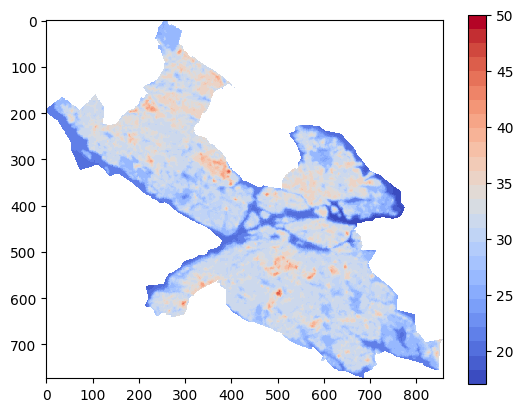

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Ladda in GeoTIFF-data
with rasterio.open('/content/sample_data/Stockholm_2017_2022.tif') as src:data = src.read(1)

# Konvertera icke-värden till NaN
data = np.where(data == src.nodata, np.nan, data)

# Definiera färgskalan baserat på de faktiska värdena i datafilen
vmin = np.nanmin(data)
vmax = 50

# Skapa en lista med färgkoder
cmap_custom = ["#436db0", "#5082bb", "#6095c5", "#71a9cf", "#83b9d8", "#97c9e0", "#aad8e9", "#bde2ee", "#cfebf3", "#e1f3f6", "#ecf8e2", "#f7fcce", "#fffcbb", "#fff1aa", "#fee79a", "#fed989", "#fec779", "#fdb668", "#fba15b", "#f88b51", "#f57446", "#e34932", "#d93328", "#c82227", "#b71126", "#a50026"]

# Använd färgkartan
cmap = plt.cm.get_cmap('coolwarm', len(cmap_custom))

# Plotta marktemperaturerna med anpassad färgsättning
plt.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax, interpolation='nearest')
plt.colorbar()
plt.show()



# Värmekarta

<ipython-input-7-103deb662113>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm', 256)


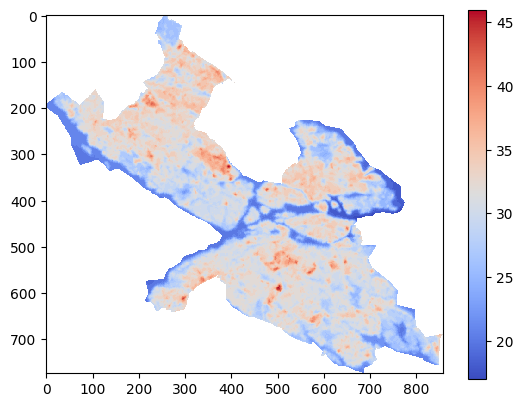

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Ladda in GeoTIFF-data
with rasterio.open('/content/sample_data/Stockholm_2017_2022.tif') as src:
    data = src.read(1)

# Konvertera icke-värden till NaN
data = np.where(data == src.nodata, np.nan, data)

# Definiera färgskalan baserat på de faktiska värdena i datafilen
vmin = np.nanmin(data)
vmax = np.nanmax(data)
cmap = plt.cm.get_cmap('coolwarm', 256)

# Plotta marktemperaturerna med anpassad färgsättning
plt.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax, interpolation='nearest')
plt.colorbar()
plt.show()

#Självklart! Här är en fullständig prompt som du kan använda för att återskapa kartan:

#Ladda in GeoTIFF-datafilen med hjälp av rasterio.
#Använd numpy för att konvertera icke-värden till NaN.
#Definiera färgskalan baserat på de faktiska värdena i datafilen.
#Använd matplotlib för att plotta marktemperaturerna med den anpassade färgsättningen.


För att skapa ovanstående Pythonkod behöver du en prompt som beskriver följande steg:

1. **Ladda Geospatial Data från en GeoTIFF-fil:**
   - Starta med att ladda geospatial data för Stockholm från en GeoTIFF-fil som täcker åren 2017 till 2022.

2. **Hantera Saknade Data:**
   - Behandla områden i datan där information saknas (NoData-värden) genom att ersätta dessa med 'NaN' (Not a Number) för att undvika felaktig tolkning av datan.

3. **Ställ in Färgskalan för Värmekartan:**
   - Bestäm den lägsta värdet i datan (som inte är 'NaN') för att använda som minsta värde på färgskalan.
   - Sätt ett maximalt värde för färgskalan, exempelvis 50.

4. **Skapa en Anpassad Färgkarta:**
   - Definiera en lista av färgkoder som ska användas för att visualisera olika värden i datan. Denna lista bör innehålla en serie av färgkoder i hexadecimal format.

5. **Använd en Inbyggd Färgkarta för Plottning:**
   - Använd en inbyggd färgkarta (till exempel 'coolwarm') och justera den efter antalet färger i den anpassade färgkartan.

6. **Plotta Värmekartan:**
   - Visa datan som en värmekarta med den anpassade färgsättningen. Använd de definierade minsta och största värdena för färgskalan och tillämpa en interpolering för att jämna ut övergångarna mellan färger.

7. **Visa en Färgskala och Plotten:**
   - Inkludera en färgskala som visar hur olika färger korrelerar med datans värden.
   - Visa den slutliga plotten.

Den här prompten beskriver processen för att skapa en värmekarta av geospatial data med anpassad färgsättning, där datan laddas från en GeoTIFF-fil och NoData-värden hanteras korrekt. Prompten fokuserar på att visualisera data med specifik färgsättning och inkluderar inte behandling av ytterligare datakällor eller komplexa geospatiala analyser.

## Värmekarta med förskolor


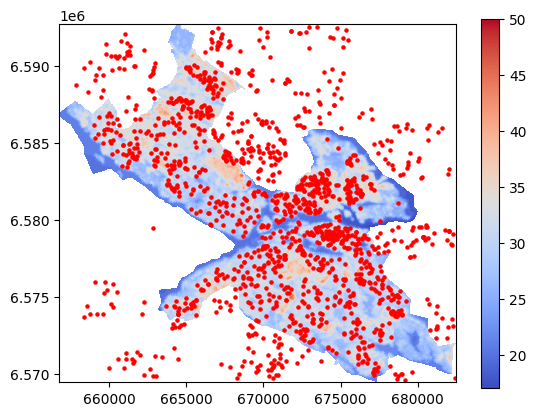

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import box

# Ladda in GeoTIFF-data
with rasterio.open('/content/sample_data/Stockholm_2017_2022.tif') as src:
    data = src.read(1)
    left, bottom, right, top = src.bounds

# Konvertera icke-värden till NaN
data = np.where(data == src.nodata, np.nan, data)

# Definiera färgskalan
vmin = np.nanmin(data)
vmax = 50

# Plotta marktemperaturerna med inbyggd färgkarta
fig, ax = plt.subplots()
img = ax.imshow(data, cmap='coolwarm', vmin=vmin, vmax=vmax, interpolation='nearest', extent=[left, right, bottom, top])
fig.colorbar(img)

# Ladda in GeoPackage-data
fp = '/content/sample_data/Forskolor_ht23_sweref.gpkg'
data = gpd.read_file(fp)

# Skapa en GeoDataFrame med bounding box
bbox = gpd.GeoDataFrame(geometry=[box(left, bottom, right, top)], crs=data.crs)

# Gör en spatial join
data_within_bbox = gpd.sjoin(data, bbox, predicate='within')

# Plotta förskolorna med samma axel
data_within_bbox.plot(ax=ax, color='red', markersize=5)

# Visa plotten
plt.show()

# Kontrollera att det finns data att plotta
if data.size > 0:
  # Spara figuren som en pdf
  fig.savefig('karta.pdf', format='pdf')
else:
  print('Inga data att plotta.')


Absolut, prompten kan formuleras på ett sätt som beskriver processen utan att gå in på detaljer om specifika programmeringsbibliotek. Här är en förenklad, icke-teknisk beskrivning:

1. **Öppna och Läs en Satellitkarta över Stockholm:**
   - Börja med att öppna en satellitkarta över Stockholm från en fil. Denna karta visar geografiska data från åren 2017 till 2022.

2. **Hantera Saknade Data:**
   - Om det finns några områden på kartan där data saknas, se till att dessa områden inte inkluderas i vidare analys.

3. **Skapa en Värmekarta:**
   - Använd kartan för att skapa en värmekarta som visar olika temperaturer eller andra relevanta mätvärden över Stockholm. Välj färger som tydligt visar variationer i datan.

4. **Ladda Punkter för Förskolor:**
   - Ladda in en annan fil som innehåller information om positioner för förskolor i Stockholm.

5. **Anpassa Förskolepositionerna till Kartan:**
   - Justera informationen om förskolor så att den endast visar de som ligger inom det område som din satellitkarta täcker.

6. **Kombinera Värmekartan med Förskolepositionerna:**
   - Lägg till markörer för förskolorna på din värmekarta. Dessa bör vara tydligt synliga och skilja sig i färg från värmekartan.

7. **Visa den Färdiga Kartan:**
   - När värmekartan och förskolepositionerna har kombinerats, visa den slutgiltiga kartan. Denna karta ska nu illustrera både geografiska data från satellitbilden och placeringen av förskolor i Stockholm.

Denna beskrivning ger en översikt över processen för att skapa en kombinerad karta med både satellitdata och punktdata för förskolor, utan att gå in på programmeringsdetaljer. Det gör det lättare för en icke-programmerare att förstå och beskriva processen.

# Trädtäckningsdata (Boverket)
https://www.boverket.se/sv/om-boverket/publicerat-av-boverket/nyheter/tradtackning/

Hämta data:

https://www.boverket.se/sv/samhallsplanering/sa-planeras-sverige/planeringsfragor/ekosystemtjanster/tradtackning/

---
Träd i den byggda miljön har stor betydelse för många ekosystemtjänster och för klimatanpassning av städer och tätorter. Träd bidrar till att sänka temperaturer varma dagar och tar hand om dagvatten. Boverket har därför tillsammans med Metria gjort en nationell kartläggning av trädtäckning i städer och tätorter som kan användas av kommuner, länsstyrelser, företag och myndigheter.

## Filinformation

In [ ]:
import pandas as pd

file_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/tradtackning-tatorter-och-deso.xlsx'

# Läs in filen
xl = pd.ExcelFile(file_path)

# Skriv ut alla flikar och deras kolumner
for sheet_name in xl.sheet_names:
    print(f"Flik: {sheet_name}")
    df = xl.parse(sheet_name)
    print(f"Kolumner: {df.columns.tolist()}\n")

# skriv pythonkod för att läsa filen file_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/tradtackning-tatorter-och-deso.xlsx' och analysera vilka flikar som finns och respektive fliks kolumner. Filens dokumentation finner du nedan###Statistik över trädtäckning
# För att kunna få en nationell bild över trädtäckningen i tätorter har Boverket låtit ta fram trädtäckningsstatistik. Statistiken återfinns i Exceldokumentet nedan och omfattar för de berörda tätorterna följande information:

# Trädtäckningen inom tätortsgränsen, (Flik tradtackning_tatorter)
# Trädtäckning för tätortsnära gräns med en buffertzon om 1 kilometer (fliken tradtackning_tatorter_buff1000).
# Trädtäckning i varje stadsdel eller demografiskt statistikområde (DeSo) inom tätortsgräns (Fliken DeSO_2018_v2_urval_tradtackning) innehåller information om för hela DeSOn inom omfattade tätortsnära gräns med buffertzon 1 kilometer.
# I varje flik finns ett antal kolumner.

# Kolumn Tätort area [ha] visar den totala arealen i hektar för området. Kolumn Trädtäckning area [ha] visar den totala trädtäckningen i hektar för aktuellt område.
# Kolumn Trädtäckning andel visar den procentuella trädtäckningen (areal i kvadratmeter).
# Kolumn Trädtäckning area [kvm] visar total trädtäckning i kvadratmeter för området.
# Kolumn Trädtäckning procent [%] visar den procentuella trädtäckningen.


Flik: tradtackning_tatorter
Kolumner: ['TATORTSKOD', 'TATORT', 'KOMMUN', 'KOMMUNNAMN', 'LAN', 'LANNAMN', 'Trädtäckning area [ha]', 'Tätort area [ha]', 'Trädtäckning procent [%]']

Flik: tradtackning_tatorter_buff1000 
Kolumner: ['OID_', 'TARGET_FID', 'TATORTSKOD', 'TATORT', 'KOMMUN', 'KOMMUNNAMN', 'LAN', 'LANNAMN', 'Trädtäckning area [ha]', 'Tätort area [ha]', 'Trädtäckning procent [%]']

Flik: DeSO_2018_v2_urval_tradtackning
Kolumner: ['deso', 'kommun', 'lan', 'kommunnamn', 'lannamn', 'version', 'DeSO area [kvm]', 'Trädtäckning area [kvm]', 'Trädtäckning procent [%]']



In [ ]:
import pandas as pd

# Ladda in Excelfilen för att analysera dess innehåll
file_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/tradtackning-tatorter-och-deso.xlsx'
excel_data = pd.ExcelFile(file_path)

# Visa namnen på flikarna i Excelfilen
sheet_names = excel_data.sheet_names

# Läsa in datan från varje flik för att få en överblick
tradtackning_tatorter_df = pd.read_excel(excel_data, sheet_name='tradtackning_tatorter')
tradtackning_tatorter_buff1000_df = pd.read_excel(excel_data, sheet_name='tradtackning_tatorter_buff1000 ')
deso_2018_df = pd.read_excel(excel_data, sheet_name='DeSO_2018_v2_urval_tradtackning')



## Analys av Trädtäckningsgrad per Tätort i Göteborgs kommun

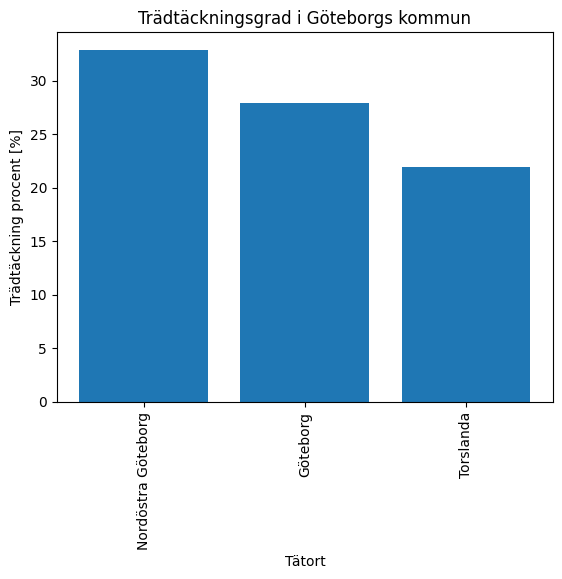

In [ ]:
# För att skapa ett diagram över trädtäckningsgrad i alla stadsdelar i Göteborgs kommun från fliken ‘tradtackning_tatorter’ kan du använda följande Python-kod:

# Python
# AI-genererad kod. Granska och använd noggrant. Mer information om vanliga frågor och svar.

import pandas as pd
import matplotlib.pyplot as plt

file_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/tradtackning-tatorter-och-deso.xlsx'

# Läs in filen
xl = pd.ExcelFile(file_path)

# Läs in datan från fliken 'tradtackning_tatorter'
df = xl.parse('tradtackning_tatorter')

# Skapa en ny DataFrame med endast data från Göteborgs kommun
gbg_df = df[df['KOMMUNNAMN'] == 'Göteborg']

# Skapa stapeldiagram
plt.bar(gbg_df['TATORT'], gbg_df['Trädtäckning procent [%]'])
plt.title("Trädtäckningsgrad i Göteborgs kommun")
plt.xlabel("Tätort")
plt.ylabel("Trädtäckning procent [%]")
plt.xticks(rotation=90)
plt.show()
# För att skapa diagrammet använder vi biblioteken pandas och matplotlib. Vi läser in Excelfilen på den angivna URL:en och läser sedan in datan från fliken ‘tradtackning_tatorter’. Vi skapar sedan en ny DataFrame med endast data från Göteborgs kommun genom att filtrera på kolumnen KOMMUNNAMN. Vi skapar sedan ett stapeldiagram som visar trädtäckningsgraden i varje tätort i Göteborgs kommun. Diagrammet visas i ett separat fönster.
# Hoppas detta hjälper!
# Jag ger dig utdata från ditt skript, nedan.
# Skapa Pythonskript som använder dessa data för att skapa ett diagram över trädtäckningsgrad i alla stadsdelar i Göteborgs kommun
# Använd bara fliken 'tradtackning_tatorter'
# ###Flik: tradtackning_tatorter
# Kolumner: ['TATORTSKOD', 'TATORT', 'KOMMUN', 'KOMMUNNAMN', 'LAN', 'LANNAMN', 'Trädtäckning area [ha]', 'Tätort area [ha]', 'Trädtäckning procent [%]']

# Flik: tradtackning_tatorter_buff1000
# Kolumner: ['OID_', 'TARGET_FID', 'TATORTSKOD', 'TATORT', 'KOMMUN', 'KOMMUNNAMN', 'LAN', 'LANNAMN', 'Trädtäckning area [ha]', 'Tätort area [ha]', 'Trädtäckning procent [%]']

# Flik: DeSO_2018_v2_urval_tradtackning
# Kolumner: ['deso', 'kommun', 'lan', 'kommunnamn', 'lannamn', 'version', 'DeSO area [kvm]', 'Trädtäckning area [kvm]', 'Trädtäckning procent [%]']


## Analys av Trädtäckningsgrad per Deso i Göteborgs kommun

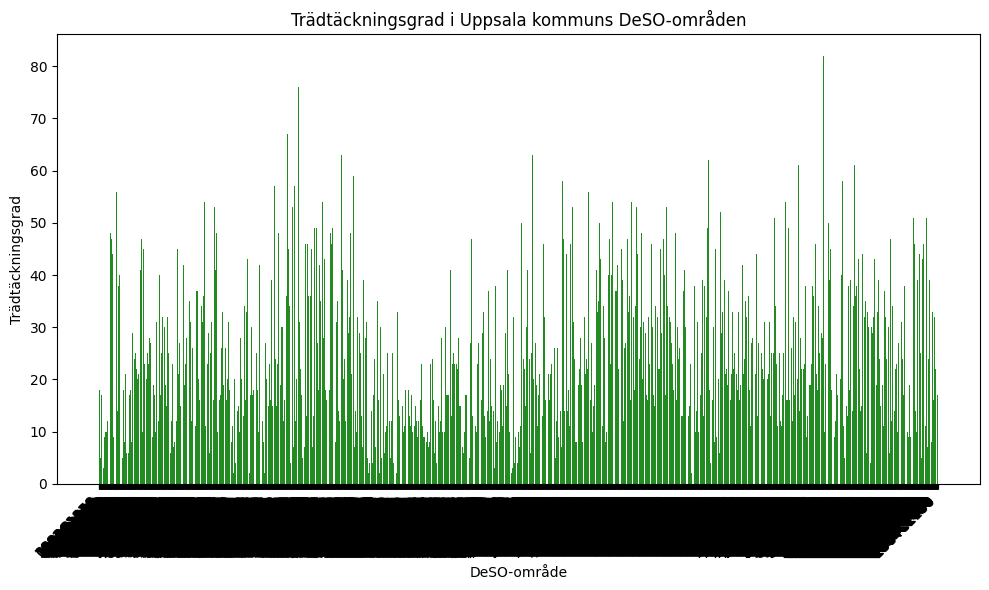

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Läs in Excelfilen från den angivna URL:en
file_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/tradtackning-tatorter-och-deso.xlsx'
df_dict = pd.read_excel(file_path, sheet_name=None)

# Extrahera data för Uppsala kommuns DeSO-områden
uppsala_deso_df = df_dict['DeSO_2018_v2_urval_tradtackning']

# Skapa ett stapeldiagram för trädtäckningsgraden
plt.figure(figsize=(10, 6))
plt.bar(uppsala_deso_df['deso'], uppsala_deso_df['Trädtäckning procent [%]'], color='forestgreen')
plt.xlabel('DeSO-område')
plt.ylabel('Trädtäckningsgrad')
plt.title('Trädtäckningsgrad i Uppsala kommuns DeSO-områden')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Visa diagrammet
plt.show()


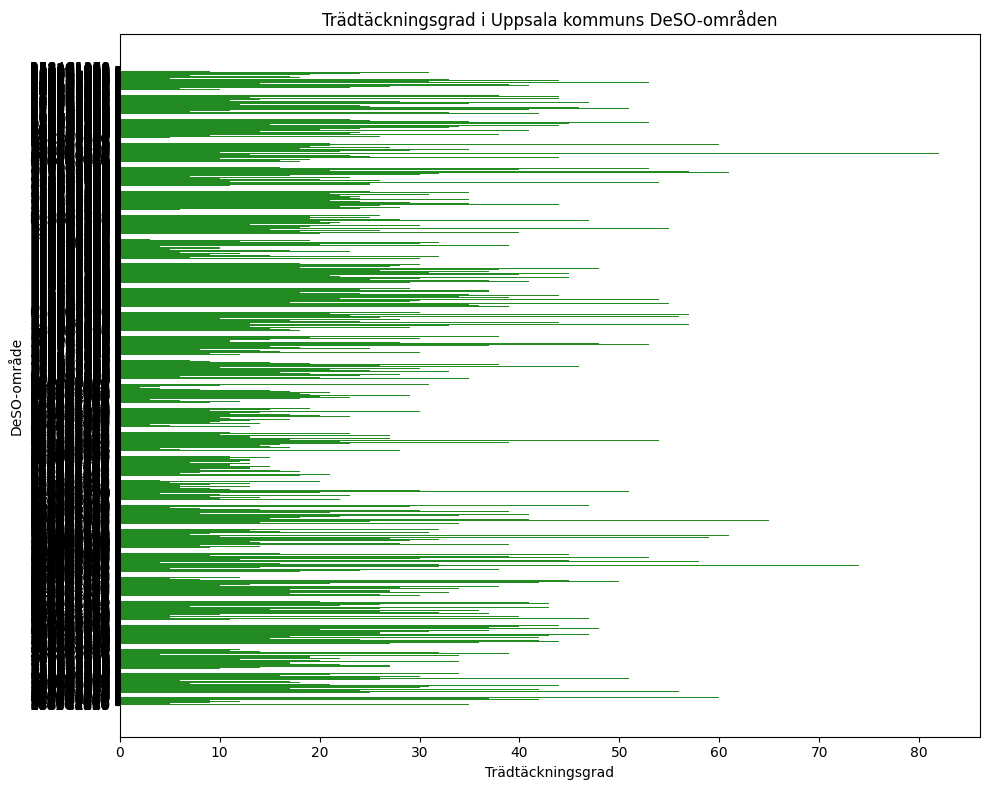

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Läs in Excelfilen från den angivna URL:en
file_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/tradtackning-tatorter-och-deso.xlsx'
df_dict = pd.read_excel(file_path, sheet_name=None)

# Extrahera data för Uppsala kommuns DeSO-områden
uppsala_deso_df = df_dict['DeSO_2018_v2_urval_tradtackning']

# Skapa ett horisontellt stapeldiagram för trädtäckningsgraden
plt.figure(figsize=(10, 8))
plt.barh(uppsala_deso_df['deso'], uppsala_deso_df['Trädtäckning procent [%]'], color='forestgreen')
plt.xlabel('Trädtäckningsgrad')
plt.ylabel('DeSO-område')
plt.title('Trädtäckningsgrad i Uppsala kommuns DeSO-områden')
plt.tight_layout()

# Visa diagrammet
plt.show()
# Oj, det blev väldigt många områden längs x-axeln, texterna blev ihoptryckta.
# Har du ett förslag på en bättre form av visualisering av många områden?
# Genererar svar åt dig…

# Absolut! Om vi har många områden längs x-axeln kan det vara svårt att läsa texten tydligt. Ett alternativ är att använda en horisontell stapeldiagram där varje stapel representerar ett DeSO-område. Låt mig uppdatera koden för att skapa en sådan visualisering:

### Ranking av Trädtäckningsgrad per Tätort i Göteborgs kommun

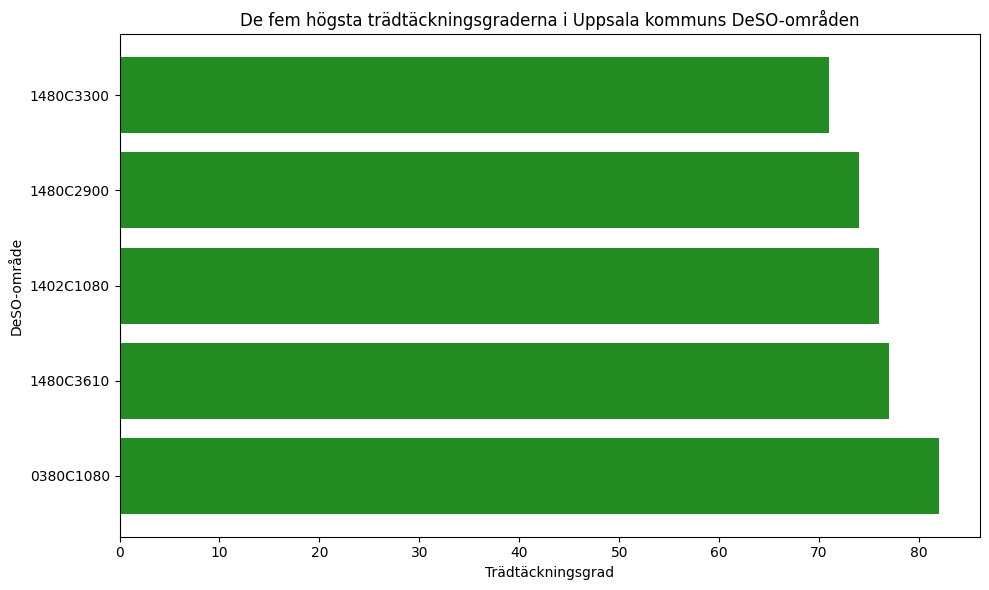

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Läs in Excelfilen från den angivna URL:en
file_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/tradtackning-tatorter-och-deso.xlsx'
df_dict = pd.read_excel(file_path, sheet_name=None)

# Extrahera data för Uppsala kommuns DeSO-områden
uppsala_deso_df = df_dict['DeSO_2018_v2_urval_tradtackning']

# Sortera områden efter trädtäckningsgrad och välj de fem högsta
top_5_deso_df = uppsala_deso_df.nlargest(5, 'Trädtäckning procent [%]')

# Skapa ett horisontellt stapeldiagram för de fem högsta trädtäckningsgraderna
plt.figure(figsize=(10, 6))
plt.barh(top_5_deso_df['deso'], top_5_deso_df['Trädtäckning procent [%]'], color='forestgreen')
plt.xlabel('Trädtäckningsgrad')
plt.ylabel('DeSO-område')
plt.title('De fem högsta trädtäckningsgraderna i Uppsala kommuns DeSO-områden')
plt.tight_layout()

# Visa diagrammet
plt.show()

# Välj bara de fem områdena med störst täckningsgrad
# Genererar svar åt dig…

# Självklart! Låt oss begränsa visualiseringen till de fem områden med högst trädtäckningsgrad. Här är den uppdaterade koden:

# Nu bör vi ha en tydlig visualisering som visar de fem områdena
# med högst trädtäckningsgrad. 🌳📊


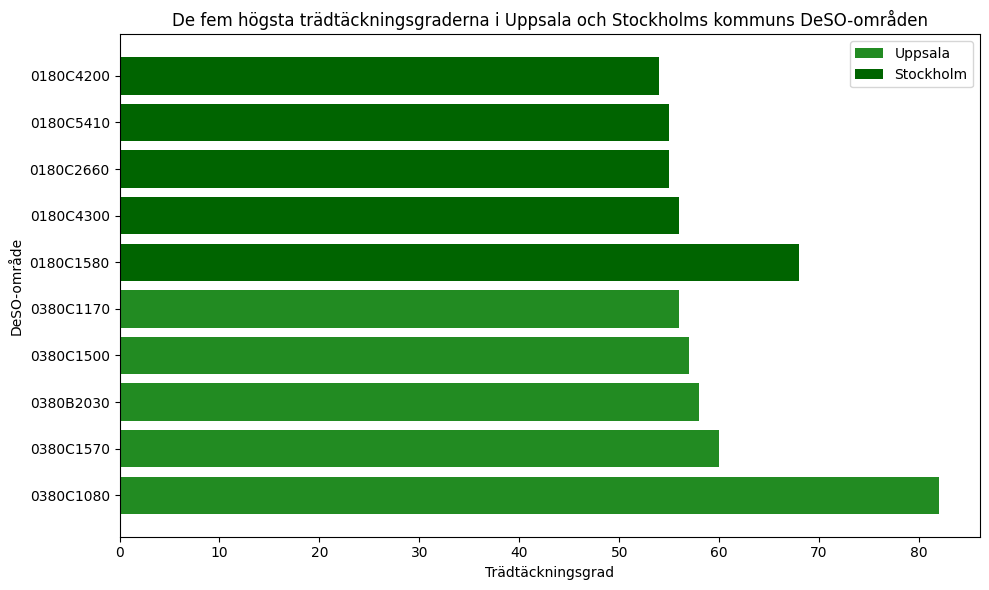

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Läs in Excelfilen från den angivna URL:en
file_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/tradtackning-tatorter-och-deso.xlsx'
df_dict = pd.read_excel(file_path, sheet_name=None)

# Filtrera fram data för Uppsala kommun
uppsala_deso_df = df_dict['DeSO_2018_v2_urval_tradtackning'].query('kommunnamn == "Uppsala"')

# Sortera områden efter trädtäckningsgrad och välj de fem högsta
top_5_uppsala_deso_df = uppsala_deso_df.nlargest(5, 'Trädtäckning procent [%]')

# Filtrera fram data för Stockholms kommun
stockholm_deso_df = df_dict['DeSO_2018_v2_urval_tradtackning'].query('kommunnamn == "Stockholm"')

# Sortera områden efter trädtäckningsgrad och välj de fem högsta
top_5_stockholm_deso_df = stockholm_deso_df.nlargest(5, 'Trädtäckning procent [%]')

# Skapa ett gemensamt stapeldiagram för de två kommunerna
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_5_uppsala_deso_df['deso'], top_5_uppsala_deso_df['Trädtäckning procent [%]'], color='forestgreen', label='Uppsala')
ax.barh(top_5_stockholm_deso_df['deso'], top_5_stockholm_deso_df['Trädtäckning procent [%]'], color='darkgreen', label='Stockholm')
ax.set_xlabel('Trädtäckningsgrad')
ax.set_ylabel('DeSO-område')
ax.set_title('De fem högsta trädtäckningsgraderna i Uppsala och Stockholms kommuns DeSO-områden')
ax.legend()
plt.tight_layout()

# Visa diagrammet
plt.show()
# Gör om följande Pythonskript så att de två kommunernas respektiva datavärden först filtreras ut, därefter räknas topp 5 ut, utifrån respektive kommuns datavärden (som du filtrerat fram)###import pandas as pd
# import matplotlib.pyplot as plt


## Trädtäckningsdata som rasterdata

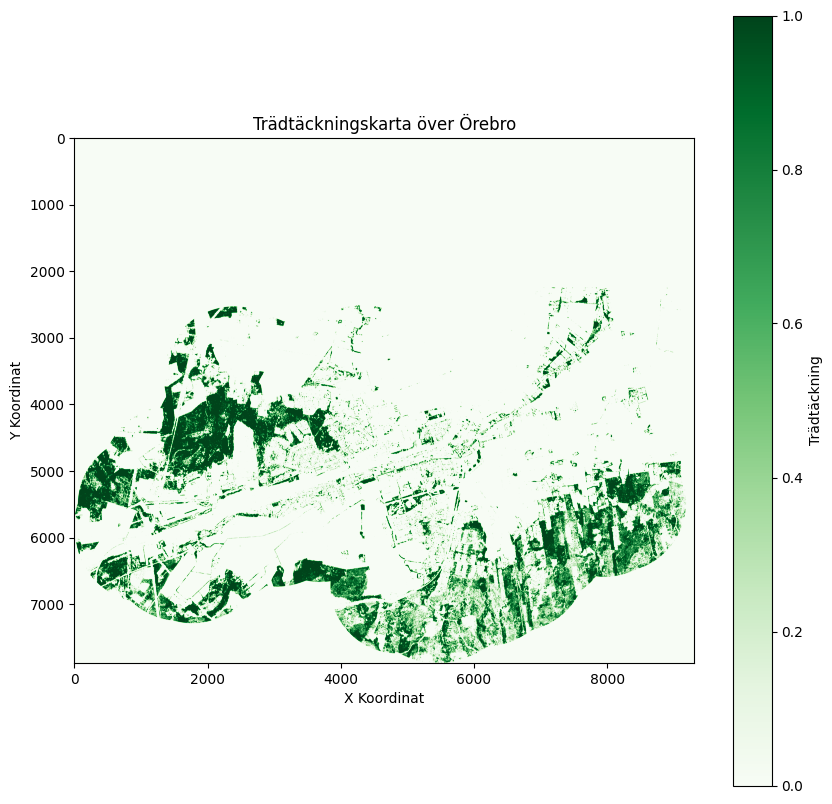

In [ ]:
import rasterio
import matplotlib.pyplot as plt

# Ladda in trädtäckningsdata (GeoTIFF) med rasterio
tree_cover_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/tradtackning_binar3m_Örebro.tif'
with rasterio.open(tree_cover_path) as src:
    tree_cover_array = src.read(1)  # Läs första bandet

# Visa trädtäckningsdatat som en bild
plt.figure(figsize=(10, 10))
plt.imshow(tree_cover_array, cmap='Greens')
plt.colorbar(label='Trädtäckning')
plt.title('Trädtäckningskarta över Örebro')
plt.xlabel('X Koordinat')
plt.ylabel('Y Koordinat')
plt.show()

# Prompten nedan användes för att skapa denna visualisering:
# 1. Importera nödvändiga bibliotek (rasterio och matplotlib.pyplot).
# 2. Ladda in GeoTIFF-filen med trädtäckningsdata med rasterio.open.
# 3. Läs det första bandet från rasterdatat för att få trädtäckningen.
# 4. Använd matplotlib för att skapa en bild av trädtäckningsdatat.
# 5. Ställ in färgschemat till 'Greens' för att representera trädtäckningen.
# 6. Lägg till en färgskala för att tolka trädtäckningsvärden.
# 7. Titel, X- och Y-axel etiketter läggs till för tydlighet.
# 8. Visa visualiseringen.


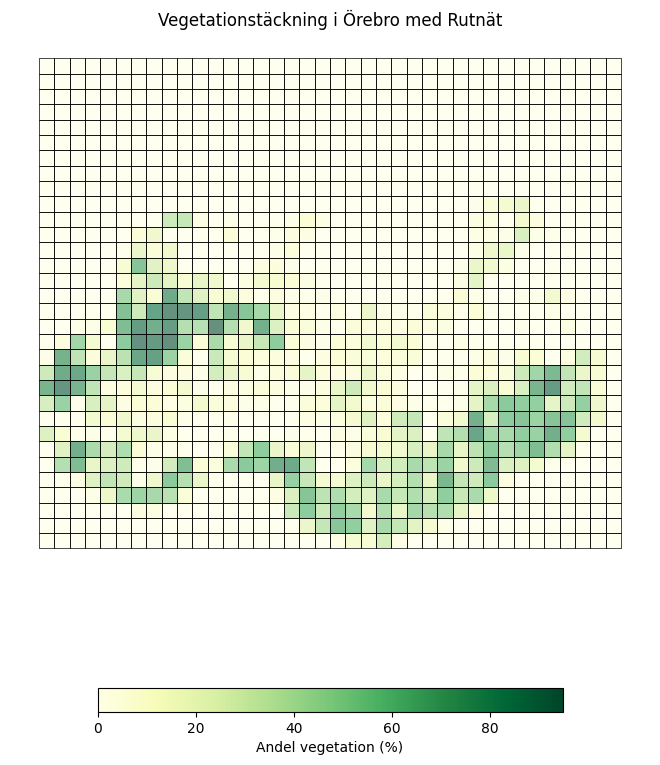

In [ ]:
import rasterio
import numpy as np
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt

# Ladda in trädtäckningsdata (GeoTIFF)
raster_path = '/content/sample_data/tradtackning_binar3m_Örebro.tif'

raster = rasterio.open(raster_path)

# Define grid size (250 meters in this case)
grid_size = 250

# Calculate the number of grid cells in x and y directions
num_cells_x = int(np.ceil((raster.bounds.right - raster.bounds.left) / grid_size))
num_cells_y = int(np.ceil((raster.bounds.top - raster.bounds.bottom) / grid_size))

# Create grid cells
grid_cells = []
for i in range(num_cells_x):
    for j in range(num_cells_y):
        x1 = raster.bounds.left + i * grid_size
        x2 = raster.bounds.left + (i + 1) * grid_size
        y1 = raster.bounds.top - j * grid_size
        y2 = raster.bounds.top - (j + 1) * grid_size
        grid_cells.append(box(x1, y2, x2, y1))

# Convert to GeoDataFrame
grid_gdf = gpd.GeoDataFrame({'geometry': grid_cells}, crs=raster.crs)

# Function to calculate vegetation coverage
def calculate_coverage(raster, grid_cell):
    # Read the raster data within the grid cell
    window = rasterio.windows.from_bounds(*grid_cell.bounds, transform=raster.transform)
    data = raster.read(1, window=window)

    # Calculate percentage of pixels with value 1 (vegetation)
    vegetation_pixels = np.sum(data == 1)
    total_pixels = data.size
    return (vegetation_pixels / total_pixels) * 100 if total_pixels > 0 else 0

# Apply the function to each grid cell
grid_gdf['vegetation_coverage'] = grid_gdf['geometry'].apply(lambda x: calculate_coverage(raster, x))

# Plotting the result with grid lines and adjusted legend
fig, ax = plt.subplots(figsize=(12, 10))
grid_gdf.plot(column='vegetation_coverage', ax=ax, cmap='YlGn', alpha=0.6, legend=True,
              legend_kwds={'label': "Andel vegetation (%)", 'orientation': "horizontal", 'shrink': 0.5})
grid_gdf.boundary.plot(ax=ax, edgecolor='black', linewidth=0.5)
ax.set_title('Vegetationstäckning i Örebro med Rutnät')
ax.set_axis_off()

# Save the plot as an image file
output_file_path = 'output_file_path_with_grid.png'  # Replace with your desired file path
fig.savefig(output_file_path, bbox_inches='tight')

# Load the road data and transform to the raster's CRS
roads_path = '/mnt/data/hallsberg_roads.geojson'
roads_gdf = gpd.read_file(roads_path).to_crs(grid_gdf.crs)

# Plotting the result with roads
fig, ax = plt.subplots(figsize=(12, 8))
grid_gdf.plot(column='vegetation_percentage', cmap='Greens', ax=ax, legend=True)
roads_gdf.plot(ax=ax, color='red', linewidth=1)
ax.set_title('Vegetation Coverage in Örebro with Roads')
ax.set_axis_off()
plt.show()

# Instructions to recreate the map:
# 1. Replace 'path_to_your_raster_file.tif' with the path to your raster file.
# 2. If needed, adjust the grid_size variable to change the size of the grid cells.
# 3. Run the script to generate and save the vegetation coverage map.
# 4. The output image will be saved to the path specified in 'output_file_path'.

# "Skapa ett Python-skript för att analysera en rasterfil med vegetationstäckning. Rasterfilen ('tradtackning_binar3m_Örebro.tif') innehåller pixelvärden där 1 representerar vegetation över 3 meter och 0 annars. Skriptet ska göra följande:
# 1. Läsa in rasterfilen.
# 2. Skapa ett rutnät med rutor på 250x250 meter.
# 3. Beräkna för varje ruta i rutnätet den procentuella andelen av pixlar med värdet 1 (vegetation).
# 4. Skapa en tematisk karta som visar dessa procentandelar, där områden med högre andel vegetation visas i mörkare gröna nyanser.
# 5. Spara kartan som en bildfil.
# Inkludera kommentarer i skriptet för varje steg och instruktioner för hur man kör skriptet och anpassar det för andra rasterfiler."



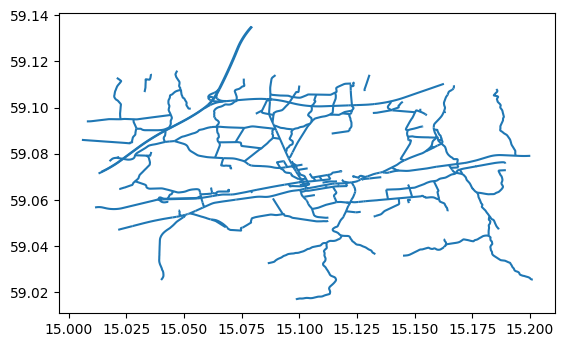

In [ ]:
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString

# API URL
url = "https://overpass-api.de/api/interpreter?data=[out:json][timeout:25];way[\"highway\"~\"motorway|trunk|primary|secondary|tertiary|unclassified\"](59.038695,15.021816,59.109342,15.184407);out body;>;out skel qt;"

# Anropa Overpass API
response = requests.get(url)
data = response.json()

# Extrahera noder och vägar
nodes = {node['id']: (node['lon'], node['lat']) for node in data['elements'] if node['type'] == 'node'}
ways = [way for way in data['elements'] if way['type'] == 'way']

# Skapa geodata
geometries = []
for way in ways:
    points = [nodes[node_id] for node_id in way['nodes']]
    geometries.append(LineString(points))

# Skapa en GeoDataFrame
gdf = gpd.GeoDataFrame(geometry=geometries)

# Skapa en karta
gdf.plot()
plt.show()

# [out:json][timeout:25];
# // Samla större vägar inom det specificerade området
# (
#   way["highway"~"motorway|trunk|primary|secondary|tertiary|unclassified"]
#     (59.038695,15.021816,59.109342,15.184407);  // Använder de omvandlade WGS 84-koordinaterna
# );
# // Skriv ut resultatet
# out body;
# >;
# out skel qt;



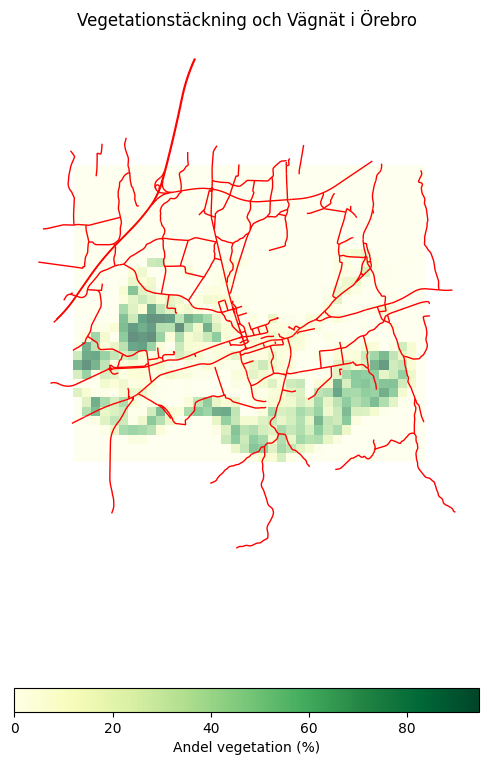

In [ ]:
import rasterio
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box, LineString
import requests

# Ladda in trädtäckningsdata (GeoTIFF)
raster_path = '/content/sample_data/tradtackning_binar3m_Örebro.tif'
raster = rasterio.open(raster_path)

# Skapa rutnät baserat på rasterdata
grid_size = 250
num_cells_x = int(np.ceil((raster.bounds.right - raster.bounds.left) / grid_size))
num_cells_y = int(np.ceil((raster.bounds.top - raster.bounds.bottom) / grid_size))
grid_cells = [box(raster.bounds.left + i * grid_size, raster.bounds.top - j * grid_size,
                  raster.bounds.left + (i + 1) * grid_size, raster.bounds.top - (j + 1) * grid_size)
              for i in range(num_cells_x) for j in range(num_cells_y)]
grid_gdf = gpd.GeoDataFrame({'geometry': grid_cells}, crs=raster.crs)

# Beräkna vegetationstäckning
def calculate_coverage(raster, grid_cell):
    window = rasterio.windows.from_bounds(*grid_cell.bounds, transform=raster.transform)
    data = raster.read(1, window=window)
    return (np.sum(data == 1) / data.size) * 100 if data.size > 0 else 0

grid_gdf['vegetation_coverage'] = grid_gdf['geometry'].apply(lambda x: calculate_coverage(raster, x))

# Anropa Overpass API för vägdata
url = "https://overpass-api.de/api/interpreter?data=[out:json][timeout:25];way[\"highway\"~\"motorway|trunk|primary|secondary|tertiary|unclassified\"](59.038695,15.021816,59.109342,15.184407);out body;>;out skel qt;"
response = requests.get(url)
data = response.json()

# Bearbeta vägdata
nodes = {node['id']: (node['lon'], node['lat']) for node in data['elements'] if node['type'] == 'node'}
ways = [way for way in data['elements'] if way['type'] == 'way']
geometries = [LineString([nodes[node_id] for node_id in way['nodes']]) for way in ways]
roads_gdf = gpd.GeoDataFrame(geometry=geometries, crs="EPSG:4326").to_crs(grid_gdf.crs)

# Rita upp både vegetation och vägar
fig, ax = plt.subplots(figsize=(12, 10))
grid_gdf.plot(column='vegetation_coverage', ax=ax, cmap='YlGn', alpha=0.6, legend=True,
              legend_kwds={'label': "Andel vegetation (%)", 'orientation': "horizontal", 'shrink': 0.5})
roads_gdf.plot(ax=ax, color='red', linewidth=1)

ax.set_title('Vegetationstäckning och Vägnät i Örebro')
ax.set_axis_off()
plt.show()


/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


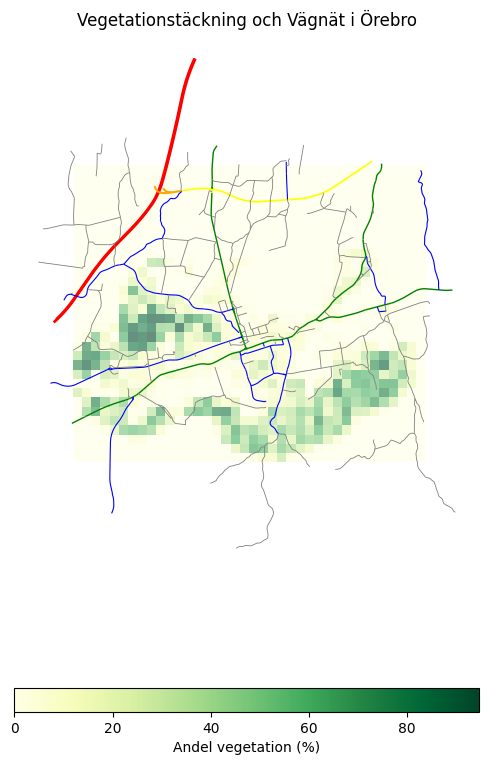

In [ ]:
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString, box
import numpy as np
import rasterio

# Ladda in trädtäckningsdata (GeoTIFF)
raster_path = '/content/sample_data/tradtackning_binar3m_Örebro.tif'
raster = rasterio.open(raster_path)

# Skapa rutnät baserat på rasterdata
grid_size = 250
num_cells_x = int(np.ceil((raster.bounds.right - raster.bounds.left) / grid_size))
num_cells_y = int(np.ceil((raster.bounds.top - raster.bounds.bottom) / grid_size))
grid_cells = [box(raster.bounds.left + i * grid_size, raster.bounds.top - j * grid_size,
                  raster.bounds.left + (i + 1) * grid_size, raster.bounds.top - (j + 1) * grid_size)
              for i in range(num_cells_x) for j in range(num_cells_y)]
grid_gdf = gpd.GeoDataFrame({'geometry': grid_cells}, crs=raster.crs)

# Beräkna vegetationstäckning
def calculate_coverage(raster, grid_cell):
    window = rasterio.windows.from_bounds(*grid_cell.bounds, transform=raster.transform)
    data = raster.read(1, window=window)
    return (np.sum(data == 1) / data.size) * 100 if data.size > 0 else 0

grid_gdf['vegetation_coverage'] = grid_gdf['geometry'].apply(lambda x: calculate_coverage(raster, x))

# Anropa Overpass API för vägdata
url = "https://overpass-api.de/api/interpreter?data=[out:json][timeout:25];way[\"highway\"~\"motorway|trunk|primary|secondary|tertiary|unclassified\"](59.038695,15.021816,59.109342,15.184407);out body;>;out skel qt;"
response = requests.get(url)
data = response.json()

# Bearbeta vägdata
nodes = {node['id']: (node['lon'], node['lat']) for node in data['elements'] if node['type'] == 'node'}
ways = [way for way in data['elements'] if way['type'] == 'way']

geometries = []
road_types = []
for way in ways:
    points = [nodes[node_id] for node_id in way['nodes']]
    geometries.append(LineString(points))
    road_types.append(way['tags'].get('highway', 'unknown'))

# Skapa en GeoDataFrame
roads_gdf = gpd.GeoDataFrame({'geometry': geometries, 'highway': road_types}, crs="EPSG:4326").to_crs(grid_gdf.crs)

# Rita upp både vegetation och vägar med olika färger och tjocklekar beroende på vägtyp
fig, ax = plt.subplots(figsize=(12, 10))
grid_gdf.plot(column='vegetation_coverage', ax=ax, cmap='YlGn', alpha=0.6, legend=True,
              legend_kwds={'label': "Andel vegetation (%)", 'orientation': "horizontal", 'shrink': 0.5})

# Väginställningar
road_colors = {'motorway': 'red', 'trunk': 'orange', 'primary': 'yellow', 'secondary': 'green', 'tertiary': 'blue', 'unclassified': 'grey', 'unknown': 'black'}
road_widths = {'motorway': 2, 'trunk': 1.5, 'primary': 1.2, 'secondary': 1, 'tertiary': 0.8, 'unclassified': 0.6, 'unknown': 0.4}

for road_type in road_colors.keys():
    subset = roads_gdf[roads_gdf['highway'] == road_type]
    subset.plot(ax=ax, color=road_colors[road_type], linewidth=road_widths[road_type])

ax.set_title('Vegetationstäckning och Vägnät i Örebro')
ax.set_axis_off()
plt.show()


/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


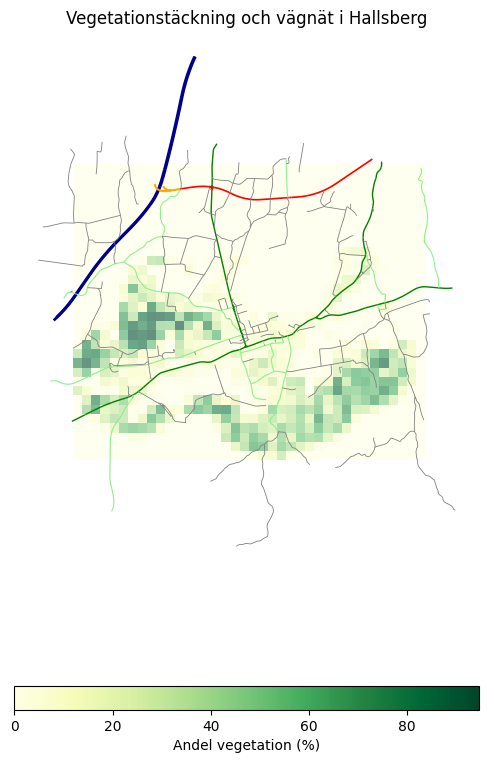

In [ ]:
import rasterio
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box, LineString
import requests

# Ladda in trädtäckningsdata (GeoTIFF)
raster_path = '/content/sample_data/tradtackning_binar3m_Örebro.tif'
raster = rasterio.open(raster_path)

# Skapa rutnät baserat på rasterdata
grid_size = 250
num_cells_x = int(np.ceil((raster.bounds.right - raster.bounds.left) / grid_size))
num_cells_y = int(np.ceil((raster.bounds.top - raster.bounds.bottom) / grid_size))
grid_cells = [box(raster.bounds.left + i * grid_size, raster.bounds.top - j * grid_size,
                  raster.bounds.left + (i + 1) * grid_size, raster.bounds.top - (j + 1) * grid_size)
              for i in range(num_cells_x) for j in range(num_cells_y)]
grid_gdf = gpd.GeoDataFrame({'geometry': grid_cells}, crs=raster.crs)

# Beräkna vegetationstäckning
def calculate_coverage(raster, grid_cell):
    window = rasterio.windows.from_bounds(*grid_cell.bounds, transform=raster.transform)
    data = raster.read(1, window=window)
    return (np.sum(data == 1) / data.size) * 100 if data.size > 0 else 0

grid_gdf['vegetation_coverage'] = grid_gdf['geometry'].apply(lambda x: calculate_coverage(raster, x))

# Anropa Overpass API för vägdata
url = "https://overpass-api.de/api/interpreter?data=[out:json][timeout:25];way[\"highway\"~\"motorway|trunk|primary|secondary|tertiary|unclassified\"](59.038695,15.021816,59.109342,15.184407);out body;>;out skel qt;"
response = requests.get(url)
data = response.json()

# Bearbeta vägdata
nodes = {node['id']: (node['lon'], node['lat']) for node in data['elements'] if node['type'] == 'node'}
ways = [way for way in data['elements'] if way['type'] == 'way']
geometries = []
road_types = []
for way in ways:
    points = [nodes[node_id] for node_id in way['nodes']]
    geometries.append(LineString(points))
    road_types.append(way['tags'].get('highway', 'unknown'))

# Skapa en GeoDataFrame för vägarna
roads_gdf = gpd.GeoDataFrame({'geometry': geometries, 'highway': road_types}, crs="EPSG:4326").to_crs(grid_gdf.crs)

# Väginställningar
road_colors = {
    'motorway': 'darkblue',
    'trunk': 'orange',
    'primary': 'red',
    'secondary': 'green',
    'tertiary': 'lightgreen',
    'unclassified': 'grey',
    'unknown': 'black'
}
road_widths = {
    'motorway': 2,
    'trunk': 1.5,
    'primary': 1.2,
    'secondary': 1,
    'tertiary': 0.8,
    'unclassified': 0.6,
    'unknown': 0.4
}

# Rita upp både vegetation och vägar
fig, ax = plt.subplots(figsize=(12, 10))
grid_gdf.plot(column='vegetation_coverage', ax=ax, cmap='YlGn', alpha=0.6, legend=True,
              legend_kwds={'label': "Andel vegetation (%)", 'orientation': "horizontal", 'shrink': 0.5})

for road_type in road_colors.keys():
    subset = roads_gdf[roads_gdf['highway'] == road_type]
    subset.plot(ax=ax, color=road_colors[road_type], linewidth=road_widths[road_type])

ax.set_title('Vegetationstäckning och vägnät i Hallsberg')
ax.set_axis_off()
plt.show()


# SMHI

## Hydrologi

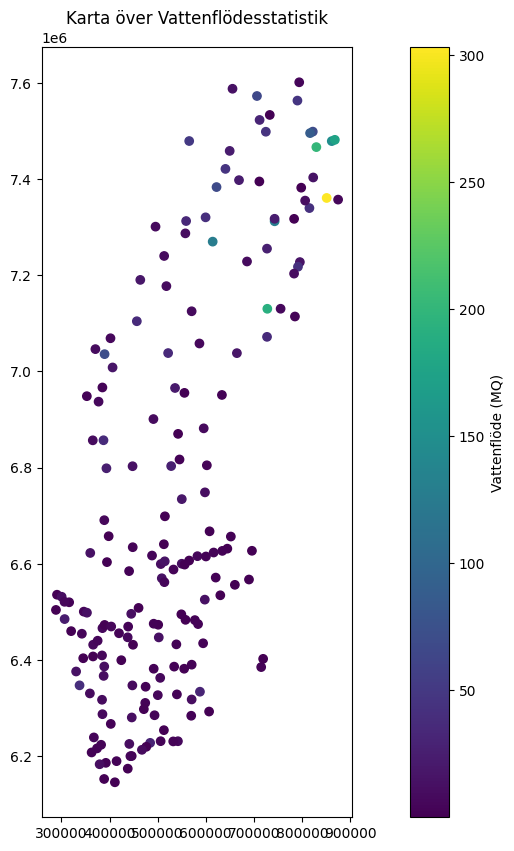

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Läs in Excel-filen med vattenflödesstatistiken
statistik_df = pd.read_excel('https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Statistik_vattenwebb_201604.xls', sheet_name='Statistik')

# Läs in Shapefilen
gdf = gpd.read_file('https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Hyd_grundnat_SMHI_2020.shp')

# Matcha stationerna baserat på stationsnummer
# Antag att 'Stationsnummer' finns både i statistikfilen och Shapefilen
merged_data = gdf.merge(statistik_df, left_on='StationsNr', right_on='Stationsnummer')

# Välj en flödesparameter att visualisera, t.ex. 'MQ'
parameter_to_visualize = 'MQ'

# Kontrollera att vald parameter finns i datamängden
if parameter_to_visualize in merged_data.columns:
    # Skapa en karta
    fig, ax = plt.subplots(figsize=(15, 10))
    merged_data.plot(column=parameter_to_visualize, ax=ax, legend=True,
                     legend_kwds={'label': f"Vattenflöde ({parameter_to_visualize})"},
                     cmap='viridis')
    plt.title('Karta över Vattenflödesstatistik')
    plt.show()
else:
    print(f"Parameter '{parameter_to_visualize}' finns inte i datamängden.")


## Oceanografi

<ipython-input-2-ed4cc65549dc>:8: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep=';', header=4)
<ipython-input-2-ed4cc65549dc>:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_seasonal = data.groupby(['Säsong', 'År']).mean().reset_index()


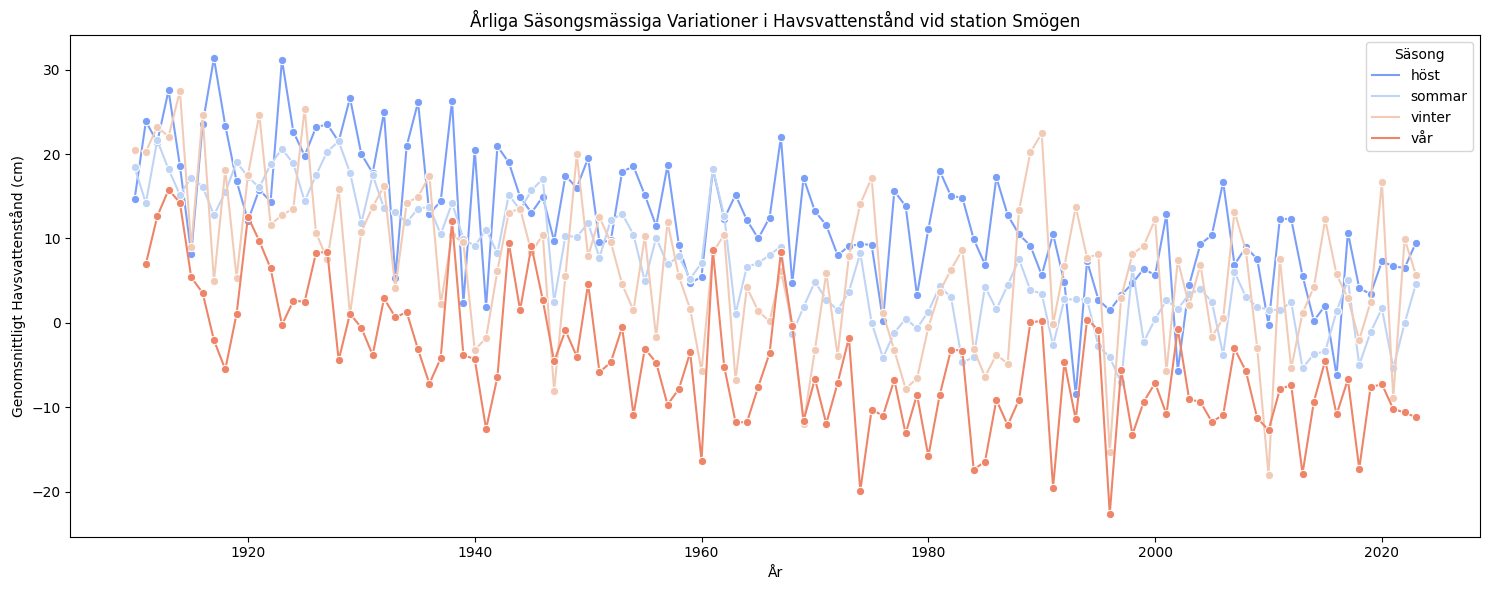

In [ ]:
# https://www.smhi.se/data/oceanografi/ladda-ner-oceanografiska-observationer#param=sealevelrh2000,stations=core,stationid=2111
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Laddar in CSV-filen
file_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/smhi-opendata_6_2111_20231122_152831.csv'
data = pd.read_csv(file_path, sep=';', header=4)

# Konverterar 'Datum Tid (UTC)' till datetime och 'Havsvattenstånd' till numeriska värden
data['Datum Tid (UTC)'] = pd.to_datetime(data['Datum Tid (UTC)'])
data['Havsvattenstånd'] = pd.to_numeric(data['Havsvattenstånd'], errors='coerce')

# Tar bort rader med NaN-värden i 'Havsvattenstånd'
data.dropna(subset=['Havsvattenstånd'], inplace=True)

# Funktion för att tilldela säsong baserat på månad
def assign_season(month):
    if month in [12, 1, 2]:
        return 'vinter'
    elif month in [3, 4, 5]:
        return 'vår'
    elif month in [6, 7, 8]:
        return 'sommar'
    else:
        return 'höst'

# Tillämpar funktionen för att skapa en ny kolumn 'Säsong' baserat på månad
data['Säsong'] = data['Datum Tid (UTC)'].dt.month.apply(assign_season)

# Lägger till kolumner för år och månad för enklare gruppering
data['År'] = data['Datum Tid (UTC)'].dt.year
data['Månad'] = data['Datum Tid (UTC)'].dt.month

# Grupperar data efter säsong och år, och beräknar medelvärdet för varje grupp
data_seasonal = data.groupby(['Säsong', 'År']).mean().reset_index()

# Skapar en tidsserieplot för säsongsmässiga variationer
plt.figure(figsize=(15, 6))
sns.lineplot(data=data_seasonal, x='År', y='Havsvattenstånd', hue='Säsong', palette='coolwarm', marker='o')
plt.title('Årliga Säsongsmässiga Variationer i Havsvattenstånd vid station Smögen')
plt.xlabel('År')
plt.ylabel('Genomsnittligt Havsvattenstånd (cm)')
plt.legend(title='Säsong')
plt.tight_layout()

# Visar plotten
plt.show()
# ChatGPT-4
# https://www.smhi.se/data/oceanografi/ladda-ner-oceanografiska-observationer#param=sealevelrh2000,stations=core,stationid=2111
# Kan du ge mig den exakta prompten till dig som behövs för att du ska kunna återskapa exakt detta diagrem?

# ChatGPT
# För att jag ska kunna återskapa exakt samma diagram som visar de årliga säsongsmässiga variationerna i havsvattenståndet vid station Smögen, kan du använda följande prompt:

# "Använd den bifogade CSV-filen med havsvattenståndsdata från station Smögen för att skapa ett diagram. Rensa och förbered datan genom att konvertera 'Datum Tid (UTC)' till datetime och 'Havsvattenstånd' till numeriska värden.
# Kategorisera sedan varje datapunkt i en säsong baserat på månaden och beräkna genomsnittliga havsvattenståndet för varje säsong och år.
# Skapa ett linjediagram som visar dessa genomsnittliga havsvattenstånd över åren, där varje säsong representeras med en unik färg och markerad med punkter.
# Titeln på diagrammet ska vara 'Årliga Säsongsmässiga Variationer i Havsvattenstånd vid station Smögen'."

# Se till att också bifoga CSV-filen med havsvattenståndsdata från station Smögen när du använder denna prompt, eftersom datan är nödvändig för att skapa diagrammet.


## Jordartsanalys

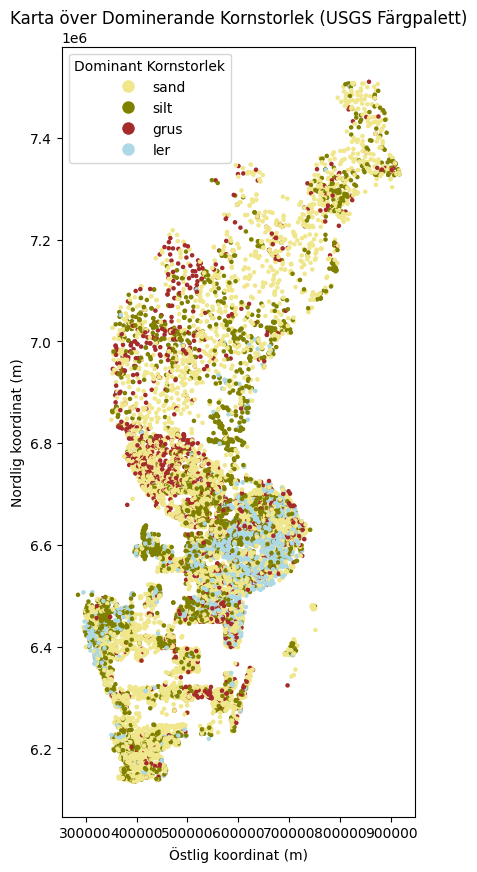

In [ ]:
# https://www.sgu.se/produkter-och-tjanster/geologiska-data/oppna-data/jordarter-oppna-data/jordartsanalyser/
# https://resource.sgu.se/dokument/produkter/oppnadata/jordartsanalyser-oppnadata-beskrivning.pdf
# Importera nödvändiga bibliotek
import geopandas as gpd
import matplotlib.pyplot as plt

# Läs in GeoPackage-filen med jordartsdata
file_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/jordartsanalyser.gpkg'
jordartsdata = gpd.read_file(file_path)

# Välj kolumner för kornstorleksfördelning och ersätt NaN-värden med 0
kornstorlek_kolumner = ['grus', 'sand', 'silt', 'ler']
jordartsdata[kornstorlek_kolumner] = jordartsdata[kornstorlek_kolumner].fillna(0)

# Skapa en ny kolumn för den dominerande kornstorleken
jordartsdata['dominant_kornstorlek'] = jordartsdata[kornstorlek_kolumner].idxmax(axis=1)

# Använd USGS-inspirerad färgpalett
usgs_colors = {
    'sand': 'khaki',      # Ljusgult/beige för sand
    'silt': 'olive',      # Olivgrönt för silt
    'grus': 'brown',      # Brun för grus
    'ler': 'lightblue'    # Ljusblå för ler
}
jordartsdata['usgs_color'] = jordartsdata['dominant_kornstorlek'].map(usgs_colors)

# Återgå till den ursprungliga metoden för att plotta datan och lägg till en legend

# Skapa kartan med USGS färgpalett
fig, ax = plt.subplots(figsize=(10, 10))
jordartsdata.plot(ax=ax, color=jordartsdata['usgs_color'], markersize=5)

# Skapa en anpassad legend för kartan
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=kornstorlek, markersize=10, markerfacecolor=color)
                   for kornstorlek, color in usgs_colors.items()]

# Lägg till legend
ax.legend(handles=legend_elements, title='Dominant Kornstorlek')

# Ställ in titel och andra inställningar
ax.set_title('Karta över Dominerande Kornstorlek (USGS Färgpalett)')
ax.set_xlabel('Östlig koordinat (m)')
ax.set_ylabel('Nordlig koordinat (m)')

# Visa kartan
plt.show()

# Spara kartan med legend
fig.savefig('/content/sample_data/karta_over_dominerande_kornstorlek_konsistent_med_legend.png')

# För att generera ett Python-skript som det jag använde för att skapa kornstorleksfördelningskartan, utifrån de två filer du har tillhandahållit (GeoPackage och PDF), skulle du behöva följa en serie av steg. Här är en detaljerad beskrivning av den exakta processen, inklusive de prompter som skulle användas:

# Steg för att Skapa Python-skriptet:
# Granska PDF-filen: Först behöver du granska PDF-filen för att förstå strukturen och innehållet i jordartsdata. Detta ger dig en översikt över vilka attribut som finns tillgängliga i GeoPackage-filen.

# Prompt: "Öppna och granska PDF-filen med beskrivningen av 'jordartsanalyser.gpkg' för att förstå vilka attribut som finns tillgängliga."

# Ladda GeoPackage-filen i Python: Använd ett Python-skript för att ladda GeoPackage-filen med jordartsdata. Du kommer att använda geopandas biblioteket för att läsa in filen.

# Prompt: "Använd Python och geopandas för att ladda in 'jordartsanalyser.gpkg'-filen."

# Analys av Datastrukturen: Efter att ha laddat in datan, analysera dess struktur för att identifiera vilka kolumner som är relevanta för kornstorleksanalys.

# Prompt: "Analysera datastrukturen i den inlästa GeoPackage-filen för att identifiera relevanta kolumner för kornstorleksanalys."

# Skapa en Kornstorleksfördelningskarta: Skriv ett Python-skript som använder data från de relevanta kolumnerna för att skapa en karta. Kartan ska visa fördelningen av kornstorlekar med en färgkodning som representerar olika jordarter.

# Prompt: "Skriv ett Python-skript för att skapa en kornstorleksfördelningskarta baserat på 'jordartsanalyser.gpkg'-datan, med en USGS-inspirerad färgpalett."

# Spara och Visa Kartan: Inkludera i skriptet funktioner för att visa och spara kartan som en bildfil.

# Prompt: "Lägg till kod för att visa och spara den skapade kartan som en bildfil i Python-skriptet."

In [ ]:
from owslib.wfs import WebFeatureService

# URL till WFS-tjänsten
url = 'https://geodata-svoa-extern.stockholm.se/server/services/Dagvatten/Tekniska_avromr_dag_recipient/MapServer/WFSServer'

# Skapa en anslutning till WFS-tjänsten
wfs = WebFeatureService(url)

# Hämta namnen på alla tillgängliga lager
layers = list(wfs.contents)

# Skriv ut alla tillgängliga lager
for layer in layers:
    print(layer)


Dagvatten_Tekniska_avromr_dag_recipient:Avrinningsområden_dagvatten


In [ ]:
!pip install owslib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.1/221.1 kB 2.2 MB/s eta 0:00:00


## Luftkvalitetsmätning

### Datavärdskap Luft

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# # ;;;;;;Nedladdat från datavärdskapet för luft, SMHI, http://www.smhi.se/datavardluft, 2023-12-18 11:13:54

# File paths for the uploaded CSV files
file_paths = [
    '/mnt/data/shair-21746-2-6-1.csv',
    '/mnt/data/shair-344250-2-5-1.csv',
    '/mnt/data/shair-344252-2-5-1.csv',
    '/mnt/data/shair-344260-2-6-1.csv'
]

# Function to load and process each CSV file
def load_and_process_csv(file_path):
    # Reading the CSV file, skipping rows that start with '#'
    data = pd.read_csv(file_path, comment='#', sep=';')
    data['Start'] = pd.to_datetime(data['Start'])  # Convert 'Start' to datetime
    data.fillna(method='ffill', inplace=True)  # Forward fill to handle NaN values
    return data

# Function to extract station name from the header of each CSV file
def extract_station_name(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith('#Stationsnamn'):
                station_name = next(file).split(';')[0].strip('#')
                return station_name
    return "Unknown Station"

# Extracting station names and loading datasets
station_names = [extract_station_name(file) for file in file_paths]
datasets = [load_and_process_csv(file) for file in file_paths]

# Choosing a distinct and contrasting color palette
colors = ['blue', 'green', 'red', 'purple']

# Plotting the data
plt.figure(figsize=(15, 8))
for i, dataset in enumerate(datasets):
    plt.plot(dataset['Start'], dataset.iloc[:, 2], label=f'Station {station_names[i]}', color=colors[i])
plt.xlabel('Datum')
plt.ylabel('PM2.5 (µg/m³)')
plt.title('Luftkvalitet över Tid per Station')
plt.legend()
plt.grid(True)

# Saving the plot as an image file
plt.savefig('/path/to/save/plot.png')


FileNotFoundError: ignored

### API-exempel SMHI


En bra metod för att göra datan mer läsbar, särskilt när vi har en stor mängd datapunkter som i ditt dataset, är att använda ett glidande medelvärde (moving average). Detta kommer att jämna ut kortsiktiga fluktuationer och visa trenden mer tydligt. Jag kommer att lägga till en glidande medelvärde-kurva till ditt linjediagram. För detta exempel kommer jag att använda ett 24-timmars glidande medelvärde, vilket är lämpligt om dina data är timvisa. Jag kommer också att minska antalet tickar på x-axeln för att göra grafen mer lättläst.

Här är den uppdaterade koden:

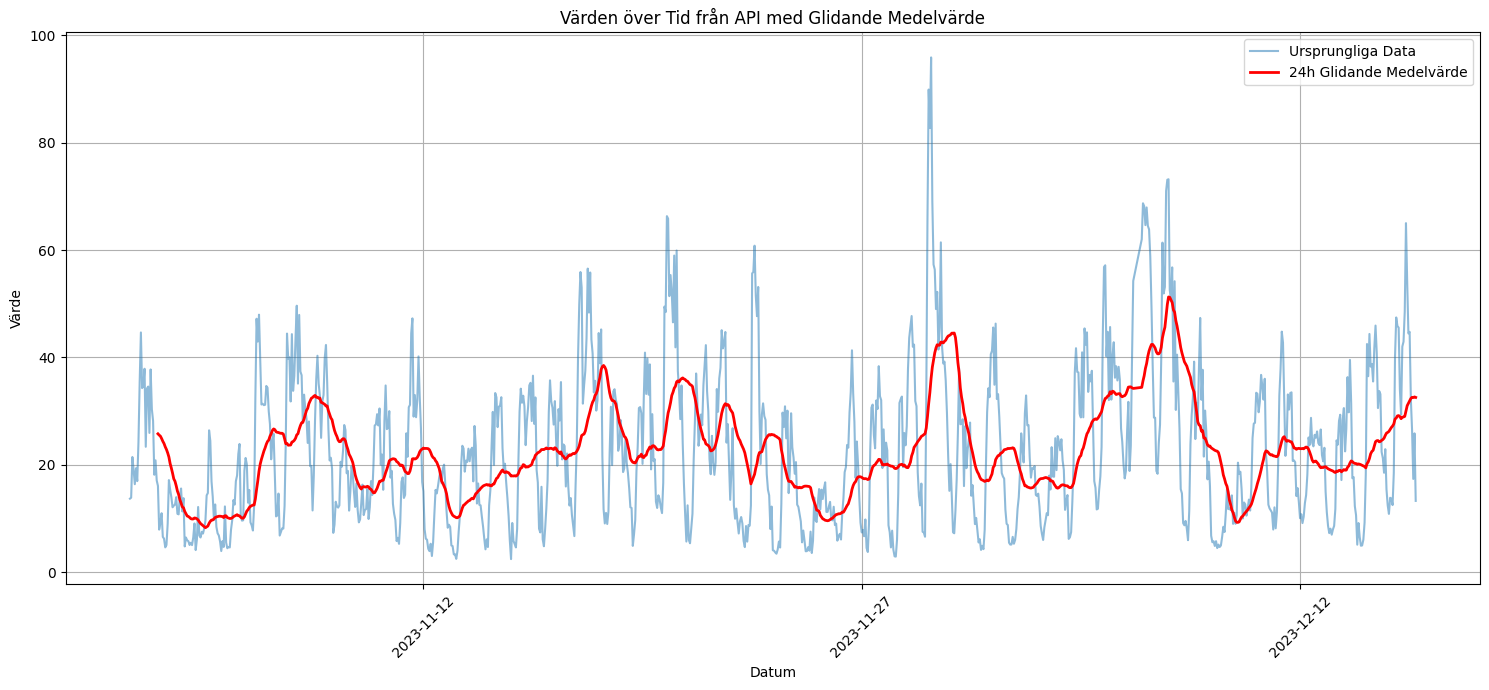

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import requests

# URL till API:et
url = "https://datavardluft.smhi.se/52North/api/timeseries/5858/getData?timespan=2023-11-01T23:00:00.000Z/2023-12-15T22:00:00.000Z"

# Gör en HTTP-förfrågan till API:et
response = requests.get(url)
data = response.json()['values']

# Konvertera till pandas DataFrame
df = pd.DataFrame(data)

# Konvertera UNIX-tidsstämplar (i millisekunder) till datum
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Beräkna det glidande medelvärdet med en 24-timmars fönsterstorlek
df['moving_average'] = df['value'].rolling(window=24).mean()

# Plotting som linjediagram
plt.figure(figsize=(15, 7))
plt.plot(df['timestamp'], df['value'], label='Ursprungliga Data', alpha=0.5)
plt.plot(df['timestamp'], df['moving_average'], label='24h Glidande Medelvärde', color='red', linewidth=2)

plt.title('Värden över Tid från API med Glidande Medelvärde')
plt.xlabel('Datum')
plt.ylabel('Värde')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))  # Justerar intervallet för x-axelns tickar
plt.legend()
plt.grid(True)
plt.tight_layout()  # Justerar layout för att passa datumetiketterna
plt.show()


### API-exempel SMHI 2

För att implementera en exponentiellt glidande medelvärde (EWMA) och färgkodning baserad på tröskelvärden för kvävedioxid (NO2) i stadsmiljö, ska vi först definiera vad dessa tröskelvärden bör vara. Enligt Världshälsoorganisationen (WHO) kan långvarig exponering för NO2-nivåer över 40 µg/m³ vara skadlig för människors hälsa. Vi kan använda detta som ett referensvärde för färgkodning.

För EWMA i pandas, använder vi ewm() funktionen som ger mer vikt åt nyare data. För färgkodning, kan vi använda ett tillståndsbaserat färgschema där värden över tröskelvärdet markeras med en annan färg i linjediagrammet.

Här är några observationer och ytterligare förbättringsförslag för diagrammet:

EWMA Kurvan: Det blåa linjen visar trenden av NO2-nivåer över tid och hjälper till att identifiera övergripande mönster.

Röda Punkter: De röda punkterna visar effektivt när NO2-nivåerna har överskridit WHO:s rekommenderade gränsvärden för långvarig exponering.

Datatäthet: Den ursprungliga datan är ganska tät, vilket kan göra det svårt att uppfatta enskilda värden. Det kan vara värt att överväga att inkludera mindre data i grafen om inte alla datapunkter är nödvändiga för analysen.

Datummärkning: Det kan vara värt att justera intervallen för datummärkning för att förbättra läsbarheten ytterligare.

Y-Axeln: Om det är möjligt, justera y-axelns skala för att den inte ska börja från noll. Detta kan ge en bättre visuell representation av variationerna i NO2-nivåer, särskilt om de är inom ett snävare område.

Informationstext: En kort beskrivning eller en legend som förklarar vad de röda punkterna representerar kan hjälpa tittaren att snabbt förstå diagrammets budskap.

Låt oss nu implementera dessa förbättringar i koden:

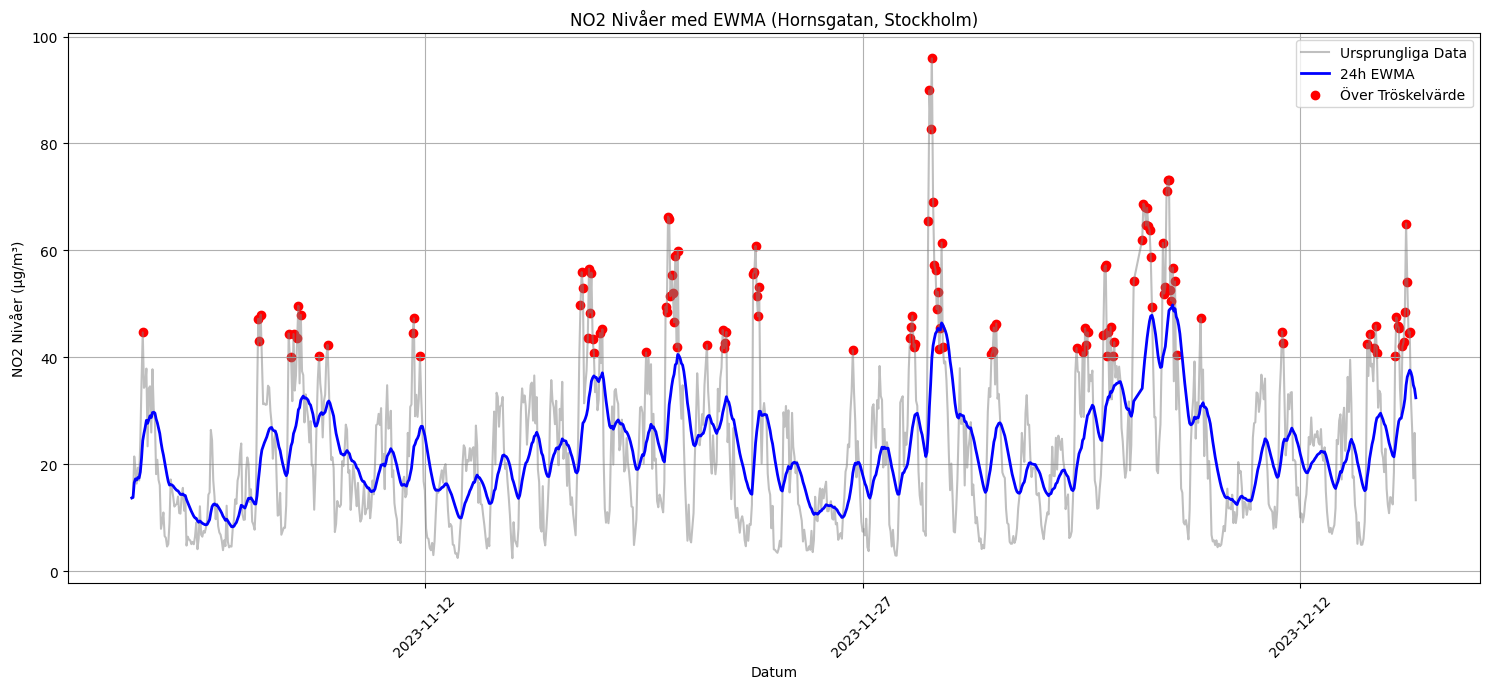

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import requests

# URL till API:et
url = "https://datavardluft.smhi.se/52North/api/timeseries/5858/getData?timespan=2023-11-01T23:00:00.000Z/2023-12-15T22:00:00.000Z"

# Gör en HTTP-förfrågan till API:et
response = requests.get(url)
data = response.json()['values']

# Konvertera till pandas DataFrame
df = pd.DataFrame(data)

# Konvertera UNIX-tidsstämplar (i millisekunder) till datum
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Beräkna exponentiellt glidande medelvärde
df['ewma'] = df['value'].ewm(span=24).mean()

# Tröskelvärden för NO2
no2_threshold = 40  # µg/m³, exempelvis WHO:s rekommendation

# Plotting som linjediagram med färgkodning
plt.figure(figsize=(15, 7))

# Ursprungliga data
plt.plot(df['timestamp'], df['value'], label='Ursprungliga Data', color='grey', alpha=0.5)

# EWMA
plt.plot(df['timestamp'], df['ewma'], label='24h EWMA', color='blue', linewidth=2)

# Markera värden över tröskelvärdet med rött
above_threshold = df['value'] > no2_threshold
plt.scatter(df['timestamp'][above_threshold], df['value'][above_threshold], color='red', label='Över Tröskelvärde')

plt.title('NO2 Nivåer med EWMA (Hornsgatan, Stockholm)')
plt.xlabel('Datum')
plt.ylabel('NO2 Nivåer (µg/m³)')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### API-exmpel SMHI 3

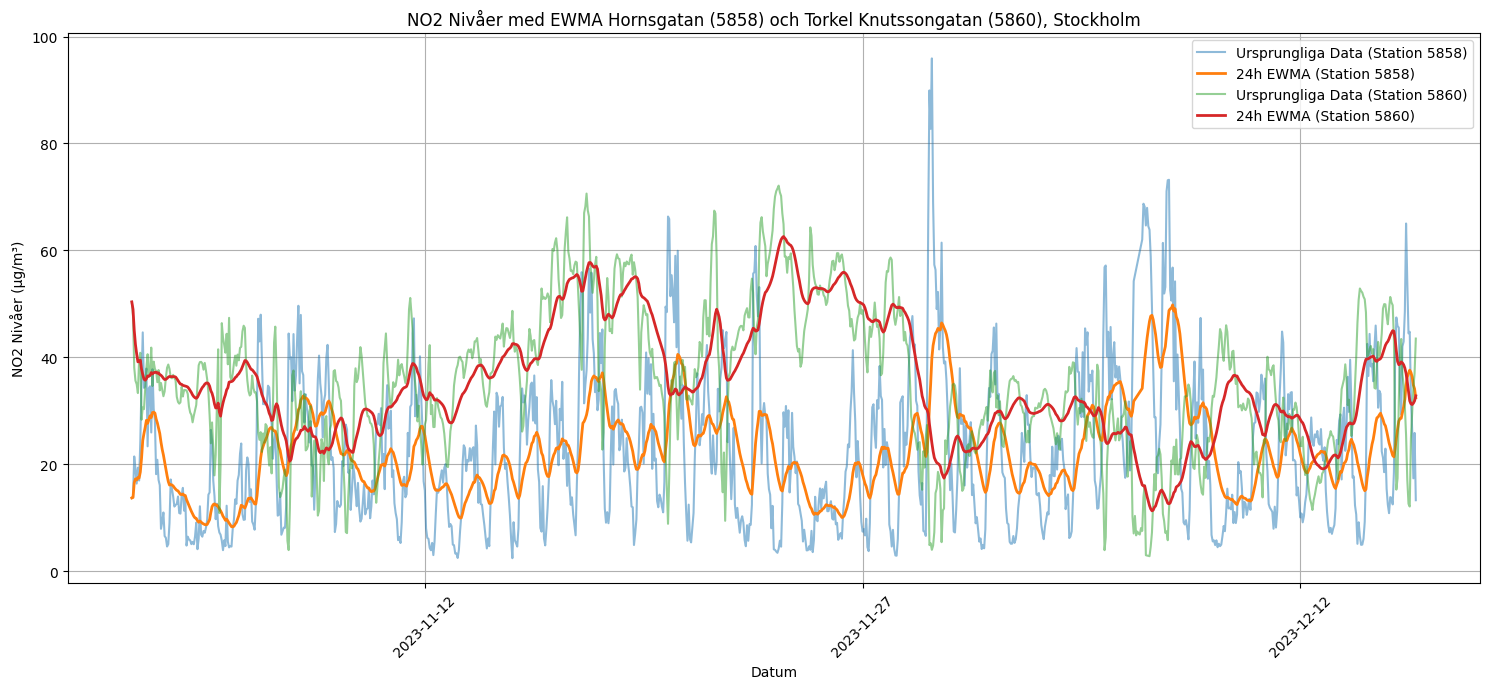

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import requests

# Hämtar data från API:et för en given mätstation
def fetch_data(station_id):
    url = f"https://datavardluft.smhi.se/52North/api/timeseries/{station_id}/getData?timespan=2023-11-01T23:00:00.000Z/2023-12-15T22:00:00.000Z"
    response = requests.get(url)
    data = response.json()['values']
    df = pd.DataFrame(data)
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df['ewma'] = df['value'].ewm(span=24).mean()
    df['station_id'] = station_id
    return df

# Hämtar data för mätstationerna 5858 och 5860
df_5858 = fetch_data(5858)
df_5860 = fetch_data(5860)

# Kombinerar data från båda mätstationerna
combined_df = pd.concat([df_5858, df_5860])

# Plotting som linjediagram med färgkodning
plt.figure(figsize=(15, 7))

# Plotta data för varje mätstation
for station_id in combined_df['station_id'].unique():
    station_df = combined_df[combined_df['station_id'] == station_id]
    plt.plot(station_df['timestamp'], station_df['value'], label=f'Ursprungliga Data (Station {station_id})', alpha=0.5)
    plt.plot(station_df['timestamp'], station_df['ewma'], label=f'24h EWMA (Station {station_id})', linewidth=2)

plt.title('NO2 Nivåer med EWMA Hornsgatan (5858) och Torkel Knutssongatan (5860), Stockholm')
plt.xlabel('Datum')
plt.ylabel('NO2 Nivåer (µg/m³)')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### API-exempel SMHI 4


För att skapa ett Pythonskript som läser data direkt från ett API och skapar en prickkarta över mätstationer i Sverige, behöver vi följa dessa steg:

Använda requests-biblioteket för att hämta data från API:et.
Använda pandas för att hantera datan.
Använda folium för att skapa en interaktiv karta.
Jag kommer att visa dig ett exempel på hur du kan göra detta. Notera att detta skript kommer att hämta data från en fördefinierad URL som du har angett. Om det finns autentiserings- eller pagineringskrav för API:et, måste skriptet anpassas för att hantera dessa.

Här är ett grundläggande skript:

In [ ]:
import requests
import pandas as pd
import folium

# URL till API:et
api_url = "https://datavardluft.smhi.se/52North/api/timeseries"

# Gör en GET-förfrågan till API:et för att hämta data
response = requests.get(api_url)
data = response.json()

# Vi antar att responsen är en lista med mätstationer
stations = pd.DataFrame(data)

# Skapa en tom karta
m = folium.Map(location=[60, 18], zoom_start=5)  # Centrerar kartan över Sverige

# Lägg till varje mätstation som en prick på kartan
for index, station in stations.iterrows():
    # Hämta koordinaterna för varje station
    coords = station['station']['geometry']['coordinates']
    # Lägg till en prick på kartan för stationen
    folium.CircleMarker(
        location=[coords[1], coords[0]],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=station['station']['properties']['label']  # Popup-label som visar stationens namn
    ).add_to(m)

# Visa kartan
m.save('station_map.html')


To create a Python script that reads data from the provided URL and converts it into a GeoJSON file, we need to perform the following steps:

Make a GET request to the URL to retrieve the data.
Parse the retrieved data (assuming it's in JSON format).
Transform the data into a GeoJSON format.
Save the GeoJSON data to a file.
Here's a basic script to accomplish this task:

In [ ]:
import requests
import json

# URL to fetch data from
url = "https://datavardluft.smhi.se/52North/api/timeseries"

def fetch_data(url):
    """ Fetches data from the given URL. """
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception("Failed to fetch data: HTTP Status Code {}".format(response.status_code))

def convert_to_geojson(data):
    """ Converts the given data to GeoJSON format. """
    geojson = {
        "type": "FeatureCollection",
        "features": []
    }

    for item in data:
        feature = {
            "type": "Feature",
            "properties": {
                "id": item["id"],
                "label": item["label"],
                "uom": item["uom"],
                "station_id": item["station"]["id"],
                "station_properties": item["station"]["properties"]
            },
            "geometry": item["station"]["geometry"]
        }
        geojson["features"].append(feature)

    return geojson

def main():
    # Fetch data from the URL
    data = fetch_data(url)

    # Convert data to GeoJSON
    geojson_data = convert_to_geojson(data)

    # Write GeoJSON data to a file
    with open("data.geojson", "w") as file:
        json.dump(geojson_data, file, indent=4)

    print("GeoJSON file created successfully.")

if __name__ == "__main__":
    main()


GeoJSON file created successfully.


In [ ]:
import geopandas as gpd
import folium
import json

# Läsa in shapefilen för Stockholm
# För att återskapa denna karta, behöver du ge information om platsen för en shapefil
# som innehåller geografiska data för Stockholms län/region i koordinatsystemet EPSG:3006 (SWEREF99 TM).
shp_file_path = '/mnt/data/Lan_Sweref99TM_region.shp'
stockholm_region = gpd.read_file(shp_file_path)

# Omvandla Stockholm-regionens koordinater till EPSG:4326 (WGS 84)
# Detta steg kräver en förståelse för koordinatsystem och hur man omvandlar dem.
# Här omvandlar vi från det svenska nationella koordinatsystemet (SWEREF99 TM) till det globala systemet (WGS 84).
stockholm_shape_4326 = stockholm_region[stockholm_region['LnNamn'] == 'Stockholms'].to_crs(epsg=4326)
bbox_4326 = stockholm_shape_4326.total_bounds  # [minx, miny, maxx, maxy]

# Funktion för att kontrollera om en station ligger inom bounding boxen
# Denna funktion är avgörande för att filtrera ut mätstationer som faktiskt ligger inom Stockholms län/region.
def station_in_bbox(station, bbox):
    lon, lat = station['geometry']['coordinates']
    return bbox[0] <= lon <= bbox[2] and bbox[1] <= lat <= bbox[3]

# Läsa in GeoJSON-data
# Här behöver du ange en filväg till en GeoJSON-fil som innehåller data om mätstationer.
# Denna fil bör innehålla koordinater i EPSG:4326-format.
geojson_file_path = '/mnt/data/data.geojson'
with open(geojson_file_path, 'r') as file:
    data = json.load(file)

# Filtrera ut mätstationer i Stockholm
# Med hjälp av den definierade bounding boxen filtrerar vi ut stationer som ligger inom Stockholms gränser.
stations_in_stockholm = [station for station in data['features'] if station_in_bbox(station, bbox_4326)]

# Skapa en karta med mätstationerna i Stockholm
# Vi använder folium-biblioteket för att skapa en interaktiv karta.
# Kartan centrerar på genomsnittskoordinaterna för Stockholms bounding box.
stockholm_center = [(bbox_4326[1] + bbox_4326[3]) / 2, (bbox_4326[0] + bbox_4326[2]) / 2]
map_stockholm_stations = folium.Map(location=stockholm_center, zoom_start=10)

# Lägger till mätstationerna på kartan
# Varje station representeras av en markör på kartan.
for station in stations_in_stockholm:
    point = station['geometry']['coordinates']
    label = station['properties']['label']
    folium.Marker(
        location=[point[1], point[0]],  # folium använder formatet (lat, lon)
        popup=label
    ).add_to(map_stockholm_stations)

# Spara och visa kartan
# Kartan sparas som en HTML-fil som sedan kan öppnas i en webbläsare.
stockholm_stations_map_path = "/mnt/data/stockholm_stations_map.html"
map_stockholm_stations.save(stockholm_stations_map_path)


# Sveriges lantbruksuniversitet (SLU)

## Mängd SARS-COV-2 i avloppsvatten (SEEC-SLU)

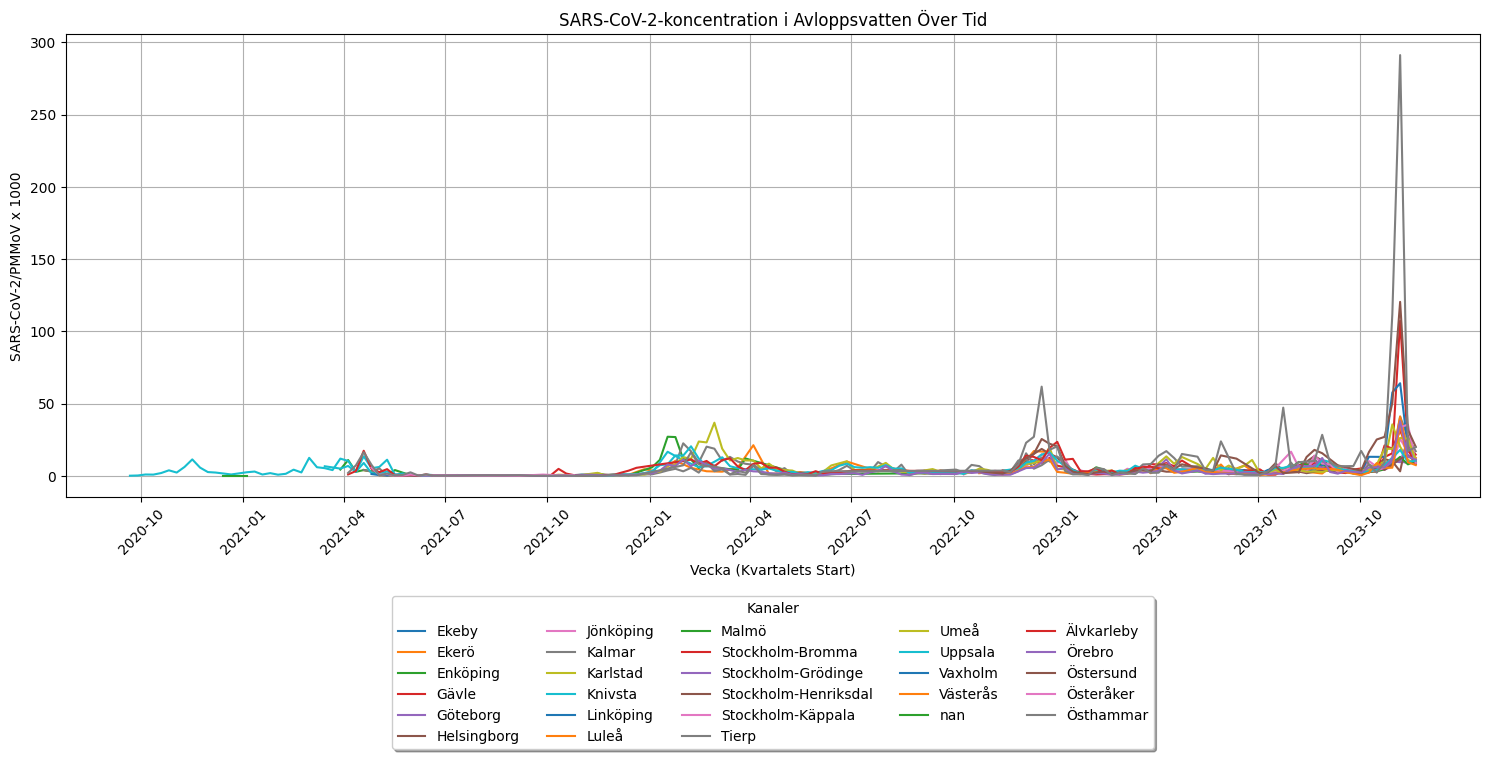

In [ ]:
# https://pathogens.se/sv/dashboards/wastewater/covid_quantification/covid_quant_slu/

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Ladda in data
file_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/SLU_wastewater_data.csv'
wastewater_data = pd.read_csv(file_path, encoding='utf-8')

# Rensa 'week'-kolumnen från asterisker innan konvertering
wastewater_data['week'] = wastewater_data['week'].str.replace('*', '', regex=False)

# Konvertera 'week' till datetime-format
wastewater_data['week'] = pd.to_datetime(wastewater_data['week'] + '-1', format='%Y-%W-%w')

# # Konvertera 'week' till datetime-format
# wastewater_data['week'] = pd.to_datetime(wastewater_data['week'] + '-1', format='%Y-%W-%w')

# Säkerställ att 'channel' behandlas som en sträng för sorteringsändamål
wastewater_data['channel'] = wastewater_data['channel'].astype(str)

# Skapa en ny figur
plt.figure(figsize=(15, 8))

# Plotta varje kanal med faktiska datapunkter
sorted_channels = sorted(wastewater_data['channel'].unique())
sns.lineplot(data=wastewater_data, x='week', y='SARS-CoV2/PMMoV x 1000', hue='channel', marker='', sort=False,
             palette=sns.color_palette("tab10", n_colors=len(sorted_channels)), hue_order=sorted_channels)

# Justera x-axelns etiketter för att endast visa starten av varje kvartal
quarter_starts = pd.date_range(start=wastewater_data['week'].min(), end=wastewater_data['week'].max(), freq='QS')
plt.xticks(quarter_starts, labels=[date.strftime('%Y-%m') for date in quarter_starts], rotation=45)

plt.title('SARS-CoV-2-koncentration i Avloppsvatten Över Tid')
plt.xlabel('Vecka (Kvartalets Start)')
plt.ylabel('SARS-CoV-2/PMMoV x 1000')
plt.grid(True)

# Justera legenden för att vara sorterad i bokstavsordning
plt.legend(title='Kanaler', loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=5)

# Spara plotten
output_file_path = '/content/sample_data/SARS-CoV-2_Concentration_Wastewater_Actual_Data_Sorted_Legend.png'
plt.tight_layout()
plt.savefig(output_file_path, bbox_inches="tight")


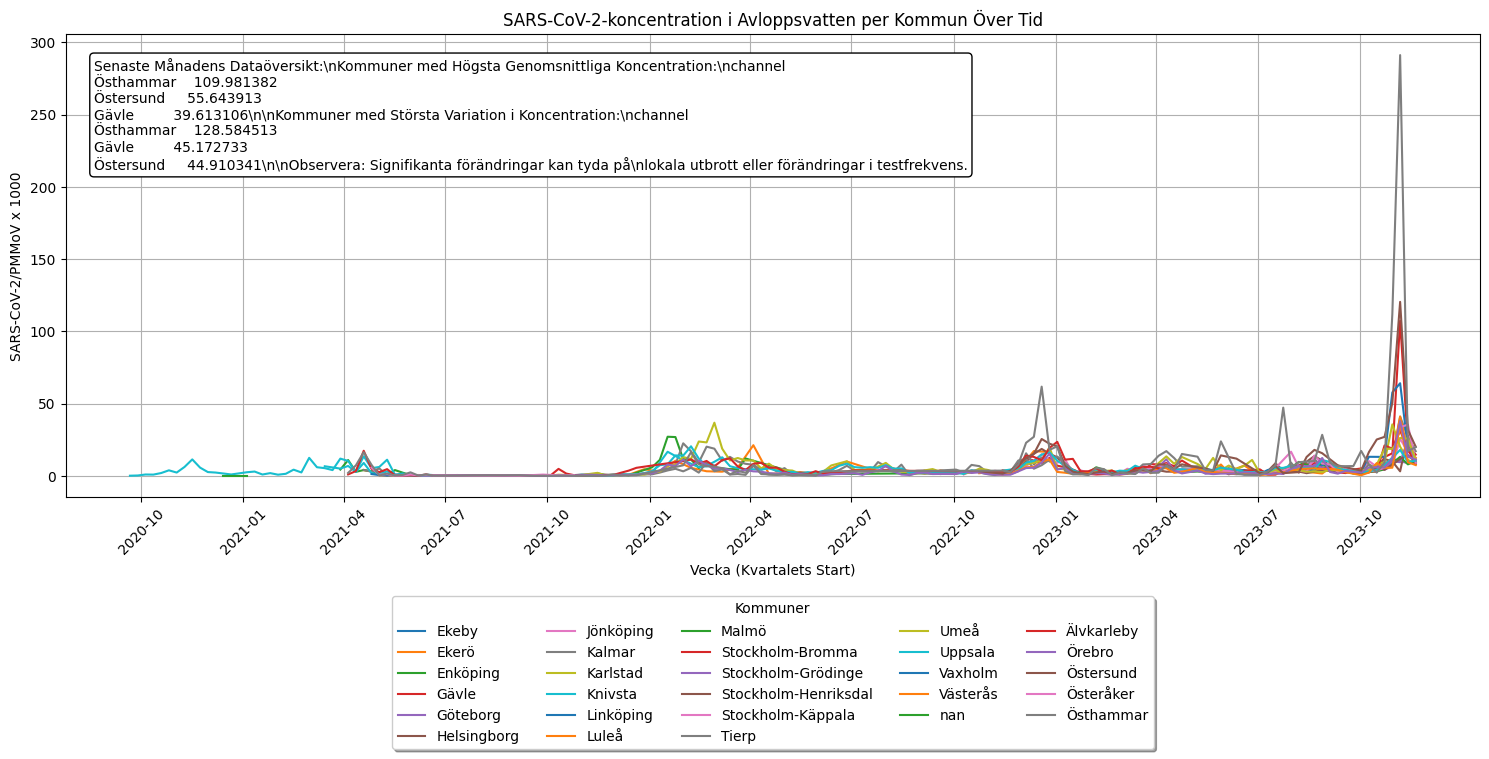

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Ladda in data
file_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/SLU_wastewater_data.csv'
wastewater_data = pd.read_csv(file_path, encoding='utf-8')

# Rensa 'week'-kolumnen från asterisker och konvertera till datetime-format
wastewater_data['week'] = wastewater_data['week'].str.replace('*', '', regex=False)
wastewater_data['week'] = pd.to_datetime(wastewater_data['week'] + '-1', format='%Y-%W-%w')

# Säkerställ att 'channel' behandlas som en sträng för sorteringsändamål
wastewater_data['channel'] = wastewater_data['channel'].astype(str)

# Analysera nyligen data för specifika trender
last_four_weeks = wastewater_data['week'].max() - pd.Timedelta(weeks=3)
recent_data = wastewater_data[wastewater_data['week'] >= last_four_weeks]
highest_avg_concentration = recent_data.groupby('channel')['SARS-CoV2/PMMoV x 1000'].mean().nlargest(3)
most_significant_changes = recent_data.groupby('channel')['SARS-CoV2/PMMoV x 1000'].std().nlargest(3)

# Konstruera den specifika texten för textrutan
text_description_specific = (
    "Senaste Månadens Dataöversikt:\\n"
    "Kommuner med Högsta Genomsnittliga Koncentration:\\n"
    f"{highest_avg_concentration.to_string()}\\n\\n"
    "Kommuner med Största Variation i Koncentration:\\n"
    f"{most_significant_changes.to_string()}\\n\\n"
    "Observera: Signifikanta förändringar kan tyda på\\n"
    "lokala utbrott eller förändringar i testfrekvens."
)

# Skapa en ny figur för den uppdaterade plotten
plt.figure(figsize=(15, 8))

# Plotta varje kommun
sorted_channels = sorted(wastewater_data['channel'].unique())
sns.lineplot(data=wastewater_data, x='week', y='SARS-CoV2/PMMoV x 1000', hue='channel', marker='', sort=False,
             palette=sns.color_palette("tab10", n_colors=len(sorted_channels)), hue_order=sorted_channels)

# Justera x-axelns etiketter
quarter_starts = pd.date_range(start=wastewater_data['week'].min(), end=wastewater_data['week'].max(), freq='QS')
plt.xticks(quarter_starts, labels=[date.strftime('%Y-%m') for date in quarter_starts], rotation=45)

plt.title('SARS-CoV-2-koncentration i Avloppsvatten per Kommun Över Tid')
plt.xlabel('Vecka (Kvartalets Start)')
plt.ylabel('SARS-CoV-2/PMMoV x 1000')
plt.grid(True)

# Lägg till den specifika textrutan
plt.text(0.02, 0.95, text_description_specific, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

# Justera legenden
plt.legend(title='Kommuner', loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=5)

# Spara plotten
output_file_path = '/content/sample_data/SARS-CoV-2_Concentration_Wastewater_With_Specific_Textbox.png'
plt.tight_layout()
plt.savefig(output_file_path, bbox_inches="tight")


# Kommunkampen WSP
https://www.wsp.com/sv-se/insikter/regionernas-kamp-2023

Map saved at your_desired_file_path.png


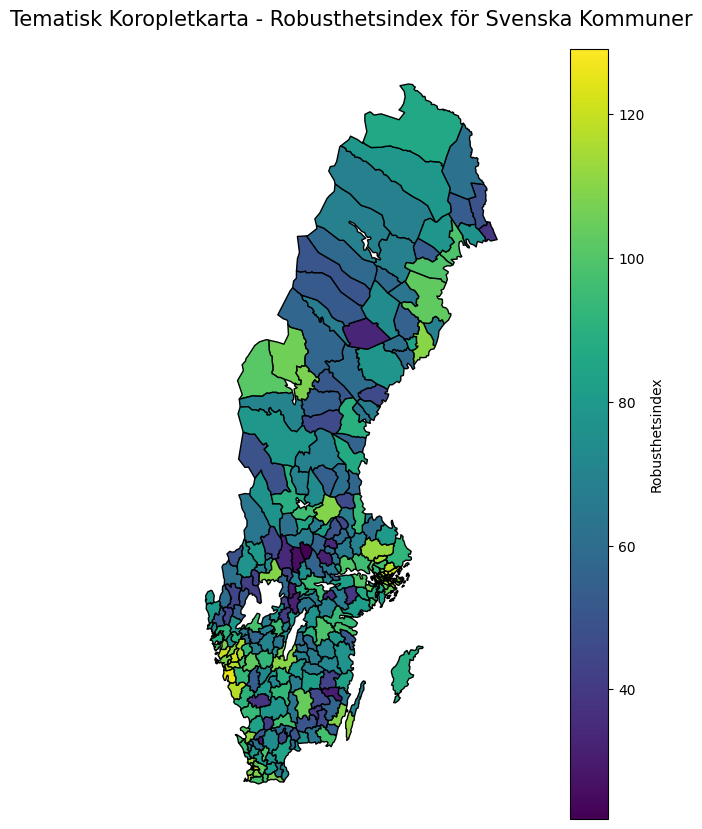

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Reading the data file
data_file_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/kommunkampen.txt'
data_df = pd.read_csv(data_file_path, encoding='utf-8')

# Reading the shapefile for the geographic data
shapefile_path = '/content/sample_data/geodata/Kommun_Sweref99TM_region.shp'
geo_df = gpd.read_file(shapefile_path)

# Correcting mismatched municipality name in the data
data_df_corrected = data_df.replace({'Kommun_namn': {'Malung-Sälen': 'Malung'}})

# Merging the data dataframe with the geographic dataframe
merged_df = geo_df.merge(data_df_corrected, left_on='KnNamn', right_on='Kommun_namn')

# Creating a choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_df.plot(column='Summa_robusthetsanalys', ax=ax, legend=True,
               legend_kwds={'label': "Robusthetsindex"},
               cmap='viridis', edgecolor='black')

# Adding titles and labels
ax.set_title('Tematisk Koropletkarta - Robusthetsindex för Svenska Kommuner', fontsize=15)
ax.set_axis_off()

# Saving the map
map_file_path = 'your_desired_file_path.png'
fig.savefig(map_file_path, dpi=300, bbox_inches='tight')

print(f"Map saved at {map_file_path}")


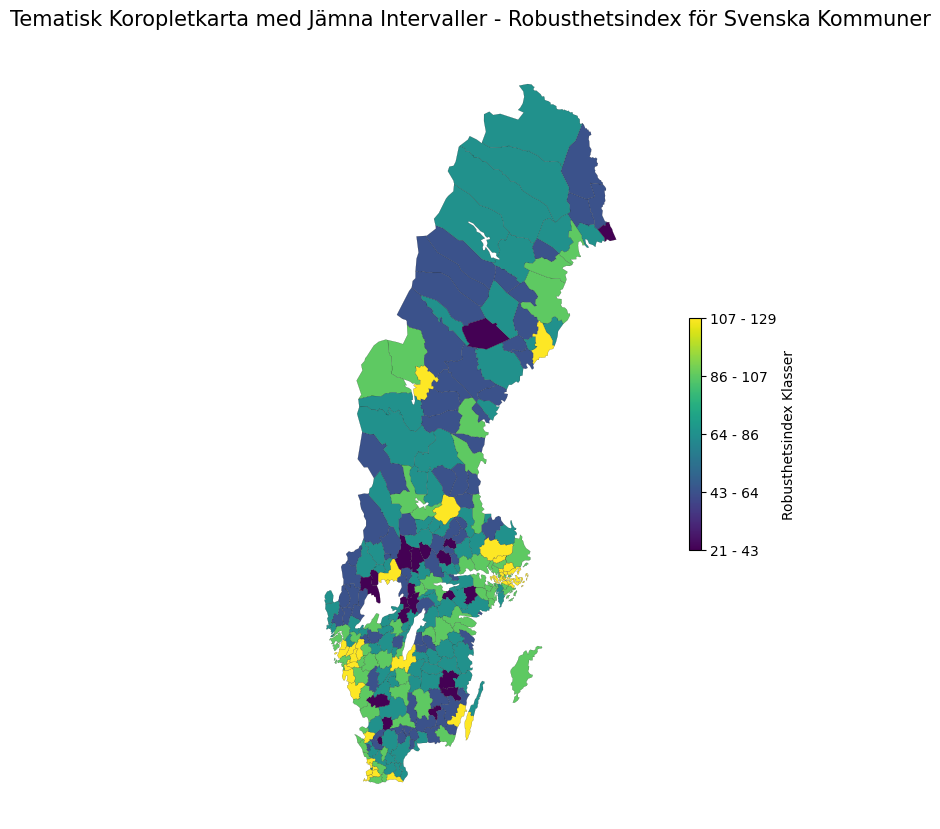

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Läs in datan
data_file_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/kommunkampen.txt'
data_df = pd.read_csv(data_file_path, encoding='utf-8')

# Läs in shapefilen för geografiska data
shapefile_path = '/content/sample_data/geodata/Kommun_Sweref99TM_region.shp'
geo_df = gpd.read_file(shapefile_path)

# Korrigera felmatchade kommunnamn i datan
data_df_corrected = data_df.replace({'Kommun_namn': {'Malung-Sälen': 'Malung'}})

# Sammanfoga datan med de geografiska uppgifterna
merged_df = geo_df.merge(data_df_corrected, left_on='KnNamn', right_on='Kommun_namn')

# Använda jämna intervall för klassindelning av choropletkarta
num_classes = 5
merged_df['class'] = pd.cut(merged_df['Summa_robusthetsanalys'], bins=num_classes, labels=False)

# Beräkna intervall för varje klass
class_intervals = pd.cut(merged_df['Summa_robusthetsanalys'], bins=num_classes)
interval_labels = class_intervals.cat.categories

# Skapa choropletkarta med heltalsintervaller i legenden
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_df.plot(column='class', cmap='viridis', linewidth=0.1, ax=ax,
               edgecolor='black', legend=True,
               legend_kwds={'label': "Robusthetsindex Klasser",
                            'orientation': "vertical",
                            'shrink': 0.3,
                            'ticks': range(num_classes),
                            'format': lambda x, _: str(interval_labels[x].left.astype(int)) + ' - ' + str(interval_labels[x].right.astype(int))})

# Ange titlar och etiketter
ax.set_title('Tematisk Koropletkarta med Jämna Intervaller - Robusthetsindex för Svenska Kommuner', fontsize=15)
ax.set_axis_off()

# Spara kartan
# adjusted_map_file_path = '/mnt/data/adjusted_robusthetsindex_map.png'
# fig.savefig(adjusted_map_file_path, dpi=300, bbox_inches='tight')


# Marktäckeanalys

# Socioekonomisk analys och analys av utanförskap

## Utsatta områden i Stockholms län

*Du får geografiska gränser för 'utsatta områden' (definitioner av de olika typerna av områden, nedan). Du får också geografiska gränser för Sveriges län (regioner). Börja med att filtrera fram Stockholms län (region). Därefter klipper du ut de utsatta områden som ingår i Stockholms län. Skapa en karta över dessa utsatta områden*
###
Utsatt område
Ett geografiskt avgränsat område som kännetecknas av en låg socioekonomisk status där de kriminella har en inverkan på lokalsamhället. Inverkan är snarare knuten till det sociala sammanhanget i området än att det finns en uttalad avsikt att ta makten och kontrollera lokalsamhället.

Påverkan kan utgöras av direkta påtryckningar, exempelvis genom hot och utpressning, eller indirekta, som:

offentliga våldshandlingar som riskerar att skada allmänheten
narkotikahandel som bedrivs öppet
ett utåtagerande missnöje mot samhället
Effekten blir att de boende i området upplever otrygghet, vilket i sin tur leder till en minskad benägenhet att anmäla brott och att medverka i rättsprocessen. Läget anses vara allvarligt.

Riskområde
Ett område som uppfyller samtliga kriterier för ett utsatt område men inte når upp till kriterierna för ett särskilt utsatt område. Läget är dock så allvarligt att det finns en överhängande risk att området blir särskilt utsatt om inte lämpliga åtgärder sätts in.

Särskilt utsatt område
Ett geografiskt avgränsat område som kännetecknas av en allmän ovilja att delta i rättsprocessen. Det kan även förekomma systematiskt hot och våld mot vittnen, målsägare och anmälare i området. Situationen innebär att det är svårt eller nästintill omöjligt för polisen att fullfölja sitt uppdrag. Många gånger har det skett en normalisering av situationen i området vilket innebär att varken polisen eller de boende reflekterar över läget i området.

Detaljerad Prompt
Ladda upp följande filer:

En shapefil för Sveriges län (regioner) inklusive filerna .dbf, .prj, .shp, .shx.
En JSON-fil med data om utsatta områden i Sverige.
Begär:

En analys för att identifiera och kartlägga utsatta områden inom Stockholms län baserat på den uppladdade shapefilen och JSON-filen.
Skapa en karta som visar dessa utsatta områden inom Stockholms län.
Specifika detaljer:

Använd geopandas för att läsa in och hantera geografiska data.
Använd shapefilen för att identifiera Stockholms län.
Använd JSON-filen för att extrahera information om utsatta områden.
Använd en spatial join eller manuell filtrering för att hitta de utsatta områdena inom Stockholms län.
Plotta en karta som visar dessa områden.

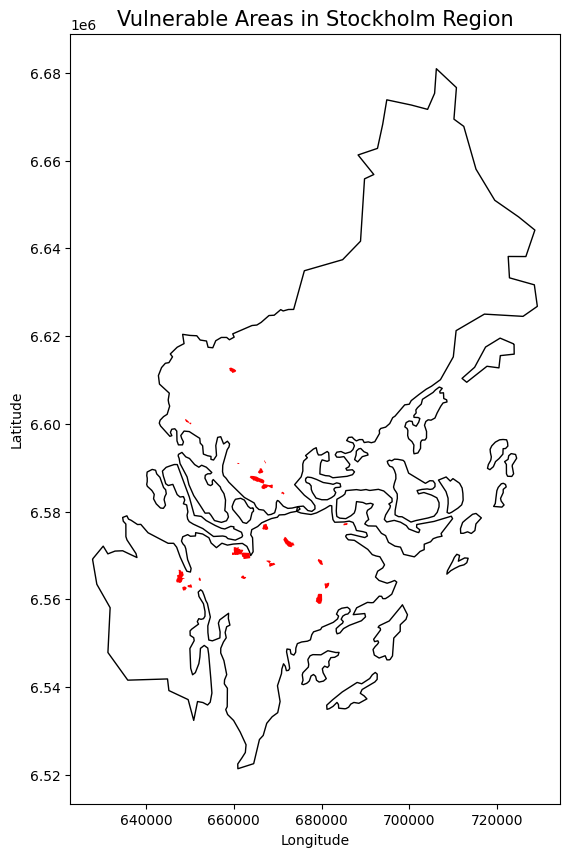

In [ ]:
import geopandas as gpd
import json
import matplotlib.pyplot as plt
import requests

# Ladda in shapefilen för Sveriges län
regions_shp_path = '/content/sample_data/geodata/Lan_Sweref99TM_region.shp'
regions = gpd.read_file(regions_shp_path)

# URL till JSON-filen på GitHub
vulnerable_areas_json_url = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/uso_2023.json'

# Använd requests för att hämta innehållet i filen
response = requests.get(vulnerable_areas_json_url)
vulnerable_areas_data = response.json()

# Konvertera JSON-data till GeoDataFrame
vulnerable_areas_gdf = gpd.GeoDataFrame.from_features(vulnerable_areas_data['features'])

# Filtrera ut Stockholms län
stockholm_region = regions[regions['LnKod'] == '01']

# Filtrera ut utsatta områden inom Stockholms län
stockholm_vulnerable_areas = vulnerable_areas_gdf[vulnerable_areas_gdf.geometry.within(stockholm_region.geometry.iloc[0])]

# Plotta en karta
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
stockholm_region.plot(ax=ax, color='white', edgecolor='black')
stockholm_vulnerable_areas.plot(ax=ax, color='red')
ax.set_title('Vulnerable Areas in Stockholm Region', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()


Du har just fått Sveriges kommungränser som geografiska data (ESRI Shape). Använd dessa data för att undersöka vilken kommun respektive utsatt område finns inom. Utgå från att ett utsatt område tillhör en enda kommun, inte flera. Använd vilken metod du vill. Skapa därefter två nya attribut i geodata för utsatta områden, ett med kommunkod och ett med kommunnamn, för den kommun inom vilket det utsatta området tillhör.

## Utsatta områden i Stockholms stad (kommun)

In [ ]:
import geopandas as gpd
import json

# Ladda in shapefilen för Sveriges kommuner
municipalities_shp_path = '/content/sample_data/geodata/Kommun_Sweref99TM_region.shp'
municipalities = gpd.read_file(municipalities_shp_path)

# URL till JSON-filen på GitHub
vulnerable_areas_json_url = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/uso_2023.json'

# Använd requests för att hämta innehållet i filen
response = requests.get(vulnerable_areas_json_url)
vulnerable_areas_data = response.json()

# Konvertera JSON-data till GeoDataFrame
vulnerable_areas_gdf = gpd.GeoDataFrame.from_features(vulnerable_areas_data['features'])

# Sätt koordinatsystemet till EPSG:3006
vulnerable_areas_gdf = vulnerable_areas_gdf.set_crs(epsg=3006)

# Manuell tilldelning av kommuninformation till varje utsatt område
for index, vulnerable_area in vulnerable_areas_gdf.iterrows():
    intersecting_municipality = municipalities[municipalities.geometry.intersects(vulnerable_area.geometry)]
    if not intersecting_municipality.empty:
        vulnerable_areas_gdf.at[index, 'KommunKod'] = intersecting_municipality.iloc[0]['KnKod']
        vulnerable_areas_gdf.at[index, 'KommunNamn'] = intersecting_municipality.iloc[0]['KnNamn']

# Spara den uppdaterade GeoDataFrame till en ny GeoPackage-fil
output_gpkg_path = '/content/sample_data/geodata/vulnerable_areas_with_municipalities.gpkg'
vulnerable_areas_gdf.to_file(output_gpkg_path, driver='GPKG')


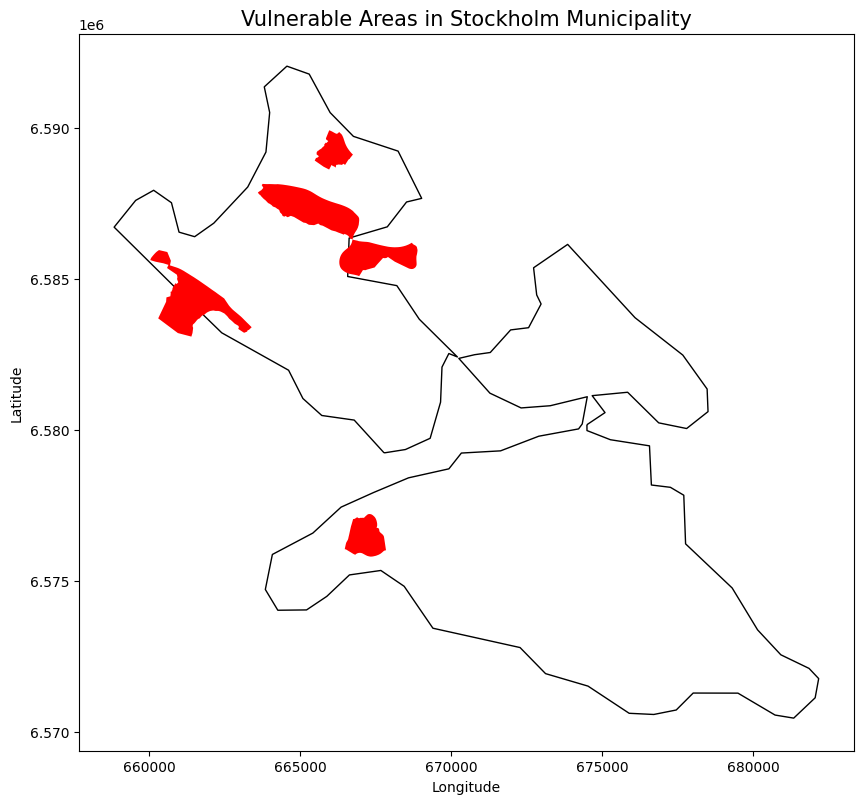

In [ ]:
import geopandas as gpd
import json
import matplotlib.pyplot as plt

# Ladda in shapefilen för Sveriges kommuner
municipalities_shp_path = '/content/sample_data/geodata/Kommun_Sweref99TM_region.shp'
municipalities = gpd.read_file(municipalities_shp_path)

# URL till JSON-filen på GitHub
vulnerable_areas_json_url = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/uso_2023.json'

# Använd requests för att hämta innehållet i filen
response = requests.get(vulnerable_areas_json_url)
vulnerable_areas_data = response.json()

# Konvertera JSON-data till GeoDataFrame
vulnerable_areas_gdf = gpd.GeoDataFrame.from_features(vulnerable_areas_data['features'])

# Manuell tilldelning av kommuninformation till varje utsatt område
for index, vulnerable_area in vulnerable_areas_gdf.iterrows():
    intersecting_municipality = municipalities[municipalities.geometry.intersects(vulnerable_area.geometry)]
    if not intersecting_municipality.empty:
        vulnerable_areas_gdf.at[index, 'KommunKod'] = intersecting_municipality.iloc[0]['KnKod']
        vulnerable_areas_gdf.at[index, 'KommunNamn'] = intersecting_municipality.iloc[0]['KnNamn']

# Filtrera de utsatta områdena som befinner sig i Stockholms kommun
stockholm_vulnerable_areas = vulnerable_areas_gdf[vulnerable_areas_gdf['KommunNamn'] == 'Stockholm']

# Plotta en karta över de utsatta områdena i Stockholms kommun
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
stockholm_municipality = municipalities[municipalities['KnNamn'] == 'Stockholm']
stockholm_municipality.plot(ax=ax, color='white', edgecolor='black')
stockholm_vulnerable_areas.plot(ax=ax, color='red')
ax.set_title('Vulnerable Areas in Stockholm Municipality', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()


*Skapa en interaktiv html/javascript/css-karta över de utsatta områdena i Stockholm. De utsatta områdena ska ritas som halvt genomskinliga, fyllda polygoner*

In [ ]:
import folium
import geopandas as gpd
import json
import requests
from IPython.display import IFrame
import base64

# Ladda in shapefilen för Sveriges kommuner
municipalities_shp_path = '/content/sample_data/geodata/Kommun_Sweref99TM_region.shp'
municipalities = gpd.read_file(municipalities_shp_path)

# URL till JSON-filen på GitHub
vulnerable_areas_json_url = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/uso_2023.json'

# Använd requests för att hämta innehållet i filen
response = requests.get(vulnerable_areas_json_url)
vulnerable_areas_data = response.json()

# Konvertera JSON-data till GeoDataFrame
vulnerable_areas_gdf = gpd.GeoDataFrame.from_features(vulnerable_areas_data['features'])

# Manuell tilldelning av kommuninformation till varje utsatt område
for index, vulnerable_area in vulnerable_areas_gdf.iterrows():
    intersecting_municipality = municipalities[municipalities.geometry.intersects(vulnerable_area.geometry)]
    if not intersecting_municipality.empty:
        vulnerable_areas_gdf.at[index, 'KommunKod'] = intersecting_municipality.iloc[0]['KnKod']
        vulnerable_areas_gdf.at[index, 'KommunNamn'] = intersecting_municipality.iloc[0]['KnNamn']

# Filtrera de utsatta områdena som befinner sig i Stockholms kommun
stockholm_vulnerable_areas = vulnerable_areas_gdf[vulnerable_areas_gdf['KommunNamn'] == 'Stockholm']

# Since the GeoDataFrame does not have a CRS set, we need to set it first before converting
# Set the CRS to EPSG:3006 (Sweref99 TM) which is the original CRS of the data
stockholm_vulnerable_areas = stockholm_vulnerable_areas.set_crs(epsg=3006)

# Now, convert the CRS to WGS84 (EPSG:4326)
stockholm_vulnerable_areas_wgs84 = stockholm_vulnerable_areas.to_crs(epsg=4326)

# Skapa en bas-karta centrerad kring Stockholm
m = folium.Map(location=[59.3293, 18.0686], zoom_start=12)

# Lägg till de utsatta områdena i Stockholm som GeoJson med popup-fönster
for _, area in stockholm_vulnerable_areas_wgs84.iterrows():
    geo_json = folium.GeoJson(
        data=area['geometry'].__geo_interface__,
        style_function=lambda feature: {
            'fillColor': 'blue',
            'color': 'blue',
            'weight': 2,
            'fillOpacity': 0.5
        }
    )
    folium.Popup(area['NAMN']).add_to(geo_json)
    geo_json.add_to(m)

# Spara kartan till en HTML-fil
html_file_path = '/content/sample_data/stockholm_vulnerable_areas_map.html'
m.save(html_file_path)

# Läs in HTML-filens innehåll
with open(html_file_path, 'r') as file:
    html_content = file.read()

# Konvertera HTML-strängen till en Data URL
data_url = "data:text/html;base64," + base64.b64encode(html_content.encode()).decode()

# Visa Data URL:en i en IFrame
IFrame(src=data_url, width="100%", height="500")


In [ ]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

# Load shapefile for municipalities
shp_file_path = '/content/sample_data/geodata/Kommun_Sweref99TM_region.shp'
sweden_municipalities = gpd.read_file(shp_file_path)

# Filter for Kungsbacka municipality
kungsbacka_municipality = sweden_municipalities[sweden_municipalities['KnNamn'] == 'Kungsbacka']

# Load the GeoTIFF file
geotiff_file_path = '/content/sample_data/N_lan_nmd2018bas_ogeneraliserad_v1_1.tif'
with rasterio.open(geotiff_file_path) as src:
    out_image, out_transform = mask(src, kungsbacka_municipality.geometry, crop=True)
    out_meta = src.meta.copy()

# Update metadata for the cropped image
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

# Masking the array to handle nodata values
out_image_masked = np.ma.masked_where(out_image == out_meta['nodata'], out_image)

# Parse the QML file for color mapping
qml_file_path = '/content/sample_data//N_lan_nmd2018bas_ogeneraliserad_v1_1.tif.qml'
# https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/kommunkampen.txt
color_mapping = {}
legend_labels = {}

tree = ET.parse(qml_file_path)
root = tree.getroot()

for palette_entry in root.iter('paletteEntry'):
    value = int(palette_entry.get('value'))
    label = palette_entry.get('label')
    color = palette_entry.get('color')
    color_mapping[value] = color
    legend_labels[value] = label

# Convert hex color codes to RGB
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) / 255 for i in (0, 2, 4))

# Apply color mapping to the raster data
out_image_rgb = np.zeros((out_image_masked.shape[0], out_image_masked.shape[1], 3))
for value in color_mapping:
    indices = out_image_masked == value
    out_image_rgb[indices] = np.array(hex_to_rgb(color_mapping[value]))

# Create patches for the legend
colormap_list = [hex_to_rgb(color_mapping.get(key, '#FFFFFF')) for key in sorted(color_mapping.keys())]
colormap = ListedColormap(colormap_list)
legend_patches = [Patch(color=hex_to_rgb(color_mapping[key]), label=legend_labels[key]) for key in sorted(legend_labels.keys())]

# Plotting the RGB raster data with the legend
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(out_image_rgb)
ax.set_title('Kungsbacka Kommun Raster Data with Land Cover Types', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


IndexError: ignored

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Läs in data från en CSV-fil
# Ersätt 'din_datafil.csv' med sökvägen till din datafil
file_path = 'din_datafil.csv'
data = pd.read_csv(file_path)

# Välj relevanta indikatorer för att skapa ett utanförskapsindex
# Jag väljer indikatorer som ger en bred översikt av socioekonomiska förhållanden.
# Exempel på indikatorer:
# - Indikator 2: Andel personer med låg ekonomisk standard. Ett högre värde kan indikera högre utanförskap.
# - Indikator 3: Andel personer med försörjningsstöd, vilket kan vara en indikator på ekonomisk utsatthet.
# - Indikator 9: Andel elever som slutfört gymnasieskolan inom fyra år. Lägre värden kan indikera utbildningsmässiga utmaningar.
# - Indikator 10: Valdeltagande i riksdagsval. Lågt valdeltagande kan vara en indikator på låg samhällsengagemang eller alienation.
relevant_indicator_ids = [2, 3, 9, 10]
relevant_data = data[data['indicator_id'].isin(relevant_indicator_ids)]

# Behåll endast kolumner med totalmått och 'regso'
total_measure_columns = [col for col in relevant_data.columns if col.endswith('tot')]
relevant_data_filtered = relevant_data[['regso'] + total_measure_columns]

# Hantera saknade värden genom att fylla dem med 0
relevant_data_filtered.fillna(0, inplace=True)

# Använd 'regso' som index
relevant_data_filtered.set_index('regso', inplace=True)

# Standardisera data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(relevant_data_filtered)

# Beräkna utanförskapsindex
exclusion_index = np.mean(standardized_data, axis=1)

# Förbered data för klusteranalys
cluster_data = np.reshape(exclusion_index, (-1, 1))

# Använd KMeans för klusteranalys
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(cluster_data)
clusters = kmeans.labels_

# Lägg till utanförskapsindex och klusterinformation i dataframen
relevant_data_filtered['ExclusionIndex'] = exclusion_index
relevant_data_filtered['Cluster'] = clusters


# Befolkningsstatistik

För att återskapa exakt detta diagram med de angivna specifikationerna, behöver jag följande detaljerade och helt deterministiska prompt:

URL för Datakälla: Ange den exakta URL:en som innehåller JSON-datan. I detta fall är det "https://www.statistikdatabasen.scb.se/sq/143466".

Teckenkodning: Specificera att datan är kodad i ISO8859-1 och behöver omkodas till UTF-8.

Datastruktur: Beskriv strukturen av JSON-datan, inklusive hur kolumnnamn och data är organiserade. Till exempel, en lista över kolumnnamn och hur dataelementen är kopplade till dessa kolumnnamn.

Könskategorier: Informera om att i datan representeras kön med siffror (t.ex. '1' för kvinnor och '2' för män) och att dessa bör översättas till mer beskrivande termer.

Uteslutning av Data: Ange att data markerad med 'totalt' för kön ska uteslutas från analysen.

Specifikation av Top 10 Regioner: Ange att diagrammet ska visa de 10 regionerna med det högsta totala antalet invånare (kvinnor plus män).

Sorteringsordning: Specificera att regionerna ska sorteras i fallande ordning baserat på det totala antalet invånare.

Diagramtyp: Begär ett stapeldiagram med separata staplar för kvinnor och män, där varje stapel representerar antalet invånare i respektive kön för varje region.

Visuell Stil och Etiketter: Ange stilpreferenser för diagrammet, såsom axelnamn ('Region' och 'Folkmängd'), titel på diagrammet ('Top 10 regioner efter folkmängd i Sverige (2022), uppdelat efter kön'), och rotation på x-axelns etiketter.

Med dessa detaljerade instruktioner kan jag skapa ett Python-skript som hämtar och bearbetar data från den angivna URL:en och genererar ett diagram enligt dina specifikationer.

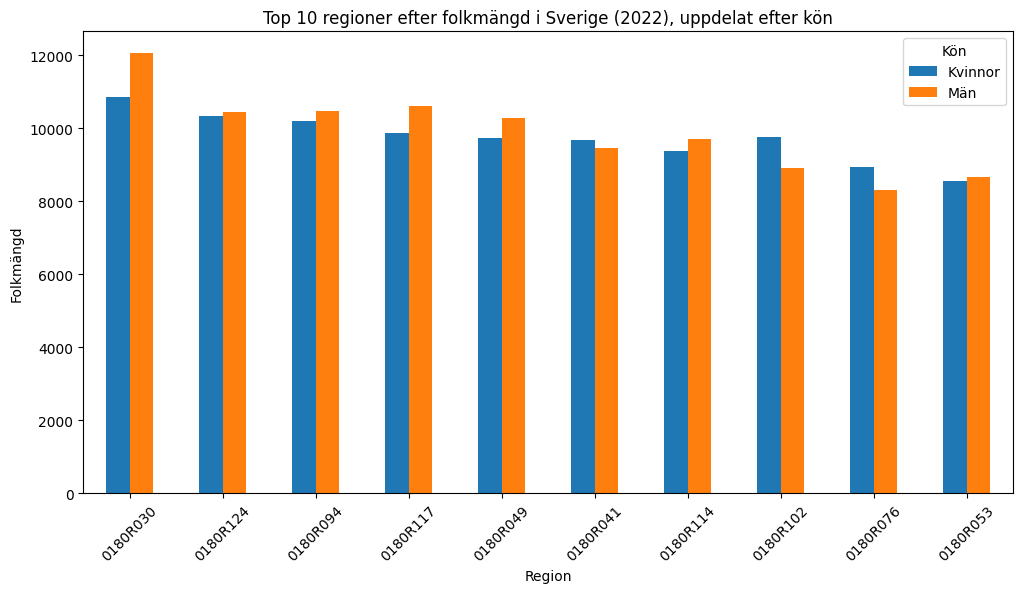

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# https://www.statistikdatabasen.scb.se/pxweb/sv/ssd/START__BE__BE0101__BE0101Y/FolkmDesoAldKonN/table/tableViewLayout1/

def fetch_and_plot_data(url):
    response = requests.get(url)
    data = response.json()
    column_info = data['columns']
    data_records = data['data']

    # Omvandla teckenkodningen
    column_names = [col['text'].encode('iso-8859-1').decode('utf-8') for col in column_info]

    # Skapa en DataFrame
    parsed_data = []
    for record in data_records:
        record_data = dict(zip(column_names[:-1], record['key']))
        record_data[column_names[-1]] = int(record['values'][0])
        parsed_data.append(record_data)
    df = pd.DataFrame(parsed_data)

    # Översätt kön från '1', '2' till 'Kvinnor', 'Män'
    gender_translation = {'1': 'Kvinnor', '2': 'Män'}
    df['kön'] = df['kön'].map(gender_translation)

    # Exkludera rader där kön är 'Totalt'
    df = df[df['kön'].isin(['Kvinnor', 'Män'])]

    # Beräkna totala antalet invånare per region och sortera regionerna
    total_population = df.groupby('region')['Folkmängden per region'].sum().nlargest(10)
    top_regions = total_population.index
    filtered_df = df[df['region'].isin(top_regions)]

    # Skapa en pivot-tabell för grupperade staplar
    pivot_df = filtered_df.pivot_table(index='region', columns='kön', values='Folkmängden per region', aggfunc='sum')

    # Sortera baserat på den totala befolkningen
    pivot_df = pivot_df.reindex(total_population.index)

    # Skapa ett grupperat stapeldiagram
    pivot_df.plot(kind='bar', stacked=False, figsize=(12, 6))
    plt.xlabel('Region')
    plt.ylabel('Folkmängd')
    plt.title('Top 10 regioner efter folkmängd i Sverige (2022), uppdelat efter kön')
    plt.xticks(rotation=45)
    plt.legend(title='Kön')
    plt.show()

# URL till datan
url = 'https://www.statistikdatabasen.scb.se/sq/143466'

# Kör funktionen
fetch_and_plot_data(url)


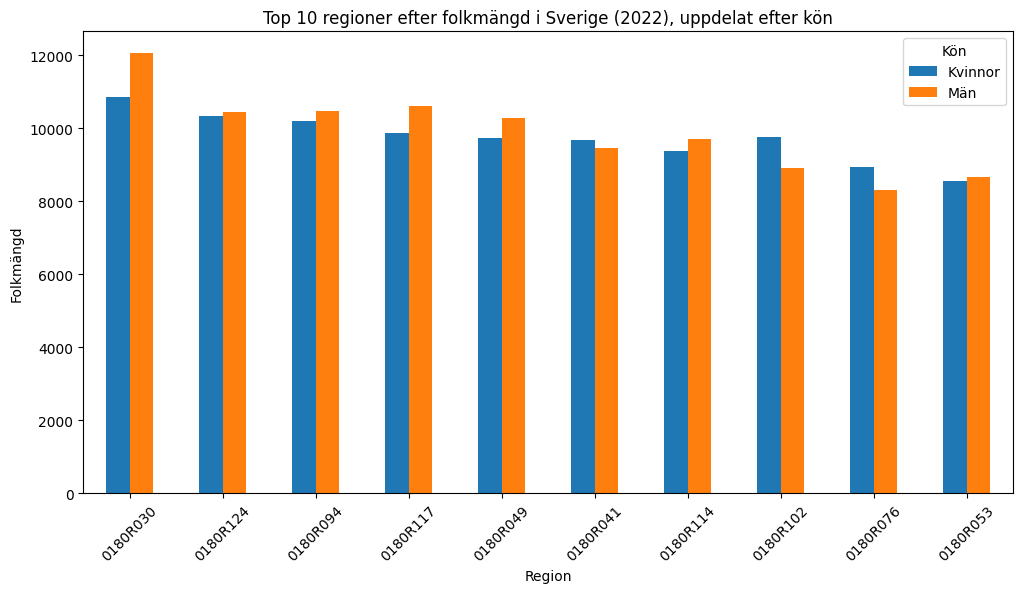

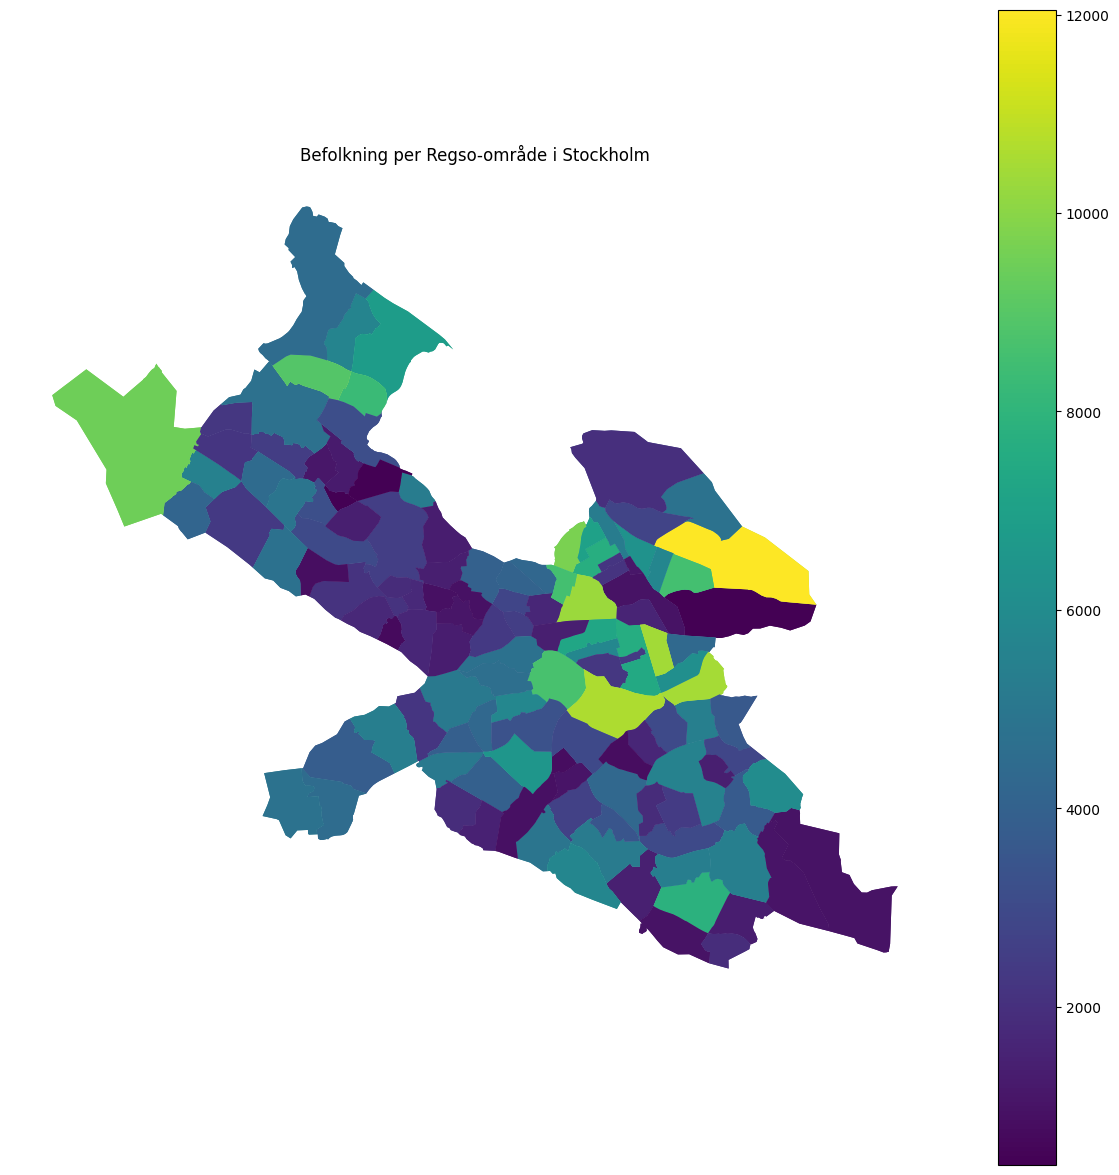

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

def fetch_and_plot_data(url):
    response = requests.get(url)
    data = response.json()
    column_info = data['columns']
    data_records = data['data']

    # Omvandla teckenkodningen
    column_names = [col['text'].encode('iso-8859-1').decode('utf-8') for col in column_info]

    # Skapa en DataFrame
    parsed_data = []
    for record in data_records:
        record_data = dict(zip(column_names[:-1], record['key']))
        record_data[column_names[-1]] = int(record['values'][0])
        parsed_data.append(record_data)
    df = pd.DataFrame(parsed_data)

    # Översätt kön från '1', '2' till 'Kvinnor', 'Män'
    gender_translation = {'1': 'Kvinnor', '2': 'Män'}
    df['kön'] = df['kön'].map(gender_translation)

    # Exkludera rader där kön är 'Totalt'
    df = df[df['kön'].isin(['Kvinnor', 'Män'])]

    # Beräkna totala antalet invånare per region och sortera regionerna
    total_population = df.groupby('region')['Folkmängden per region'].sum().nlargest(10)
    top_regions = total_population.index
    filtered_df = df[df['region'].isin(top_regions)]

    # Skapa en pivot-tabell för grupperade staplar
    pivot_df = filtered_df.pivot_table(index='region', columns='kön', values='Folkmängden per region', aggfunc='sum')

    # Sortera baserat på den totala befolkningen
    pivot_df = pivot_df.reindex(total_population.index)

    # Skapa ett grupperat stapeldiagram
    pivot_df.plot(kind='bar', stacked=False, figsize=(12, 6))
    plt.xlabel('Region')
    plt.ylabel('Folkmängd')
    plt.title('Top 10 regioner efter folkmängd i Sverige (2022), uppdelat efter kön')
    plt.xticks(rotation=45)
    plt.legend(title='Kön')
    plt.show()

    return df

def create_population_map(gdf, df):
    # Filtrera geodata för att endast inkludera områden som finns i befolkningsdatan
    stockholm_regions = df['region'].unique()
    stockholm_gdf = gdf[gdf['regsokod'].isin(stockholm_regions)]

    # Sammanfoga geodata med befolkningsdata baserat på 'region'
    merged_gdf = stockholm_gdf.merge(df, left_on='regsokod', right_on='region', how='inner')

    # Skapa en tematisk karta
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    merged_gdf.plot(column='Folkmängden per region', ax=ax, legend=True, cmap='viridis')
    ax.set_title('Befolkning per Regso-område i Stockholm')
    ax.set_axis_off()
    plt.show()

# URL till datan
url = 'https://www.statistikdatabasen.scb.se/sq/143466'
df = fetch_and_plot_data(url)

# Ladda geodata
gdf = gpd.read_file('/content/sample_data/geodata/RegSO_2018_v2.gpkg')

# Skapa en tematisk karta över Stockholm
create_population_map(gdf, df)



För att maximera de visuella skillnaderna på befolkningskartan över Stockholm används kvantilindelning. Denna metod delar upp befolkningsdata i fem jämnt fördelade klasser, så att varje klass innehåller ett lika stort antal områden. Genom att använda olika färger för varje klass blir det enklare att visuellt skilja områden med olika befolkningsstorlekar åt. Detta gör det tydligare att identifiera både tätbefolkade och mindre befolkade områden på kartan.

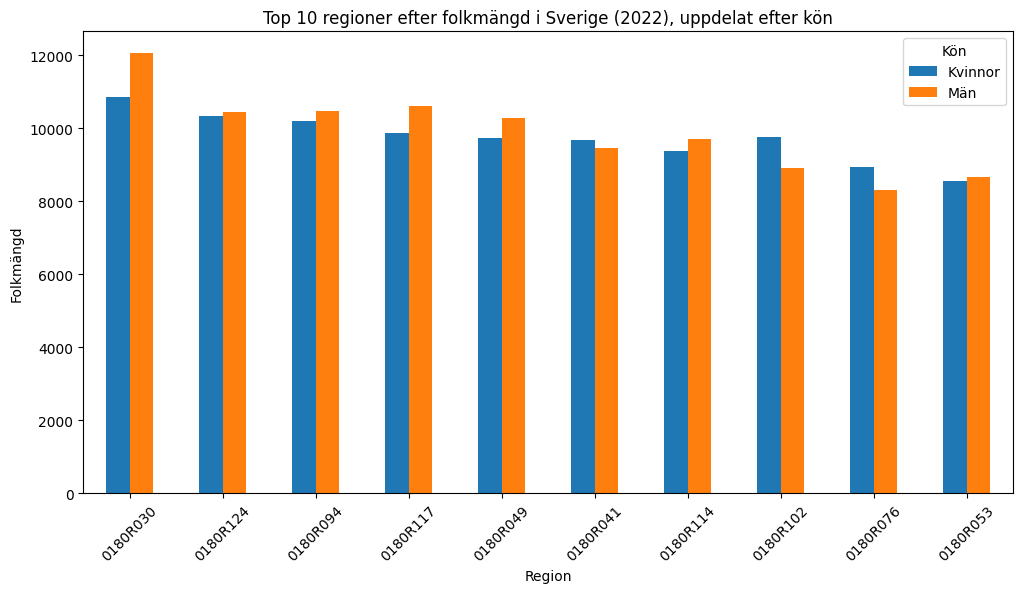

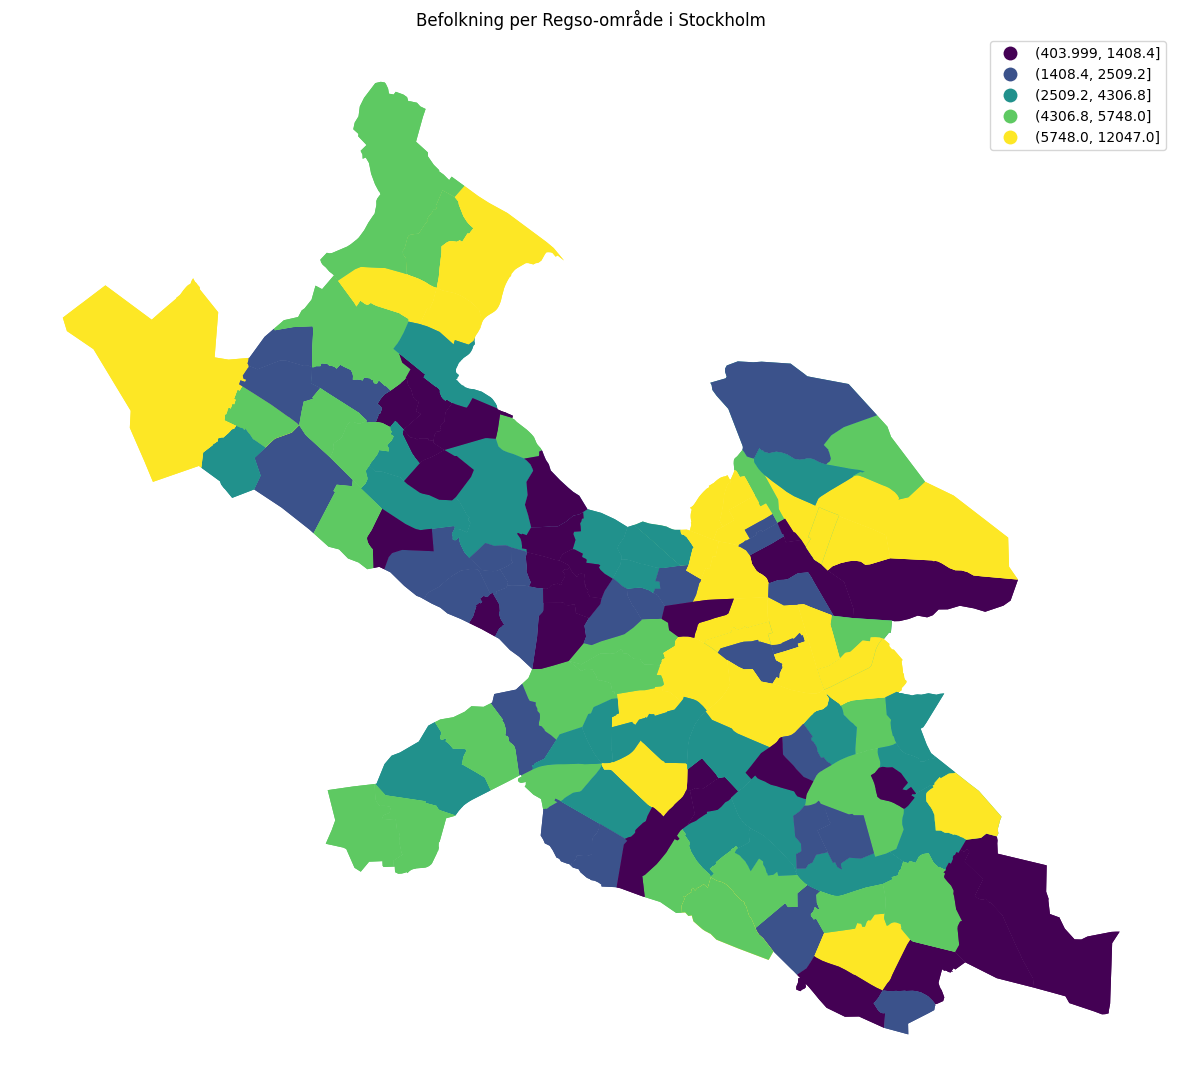

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

def fetch_and_plot_data(url):
    response = requests.get(url)
    data = response.json()
    column_info = data['columns']
    data_records = data['data']

    # Omvandla teckenkodningen
    column_names = [col['text'].encode('iso-8859-1').decode('utf-8') for col in column_info]

    # Skapa en DataFrame
    parsed_data = []
    for record in data_records:
        record_data = dict(zip(column_names[:-1], record['key']))
        record_data[column_names[-1]] = int(record['values'][0])
        parsed_data.append(record_data)
    df = pd.DataFrame(parsed_data)

    # Översätt kön från '1', '2' till 'Kvinnor', 'Män'
    gender_translation = {'1': 'Kvinnor', '2': 'Män'}
    df['kön'] = df['kön'].map(gender_translation)

    # Exkludera rader där kön är 'Totalt'
    df = df[df['kön'].isin(['Kvinnor', 'Män'])]

    # Beräkna totala antalet invånare per region och sortera regionerna
    total_population = df.groupby('region')['Folkmängden per region'].sum().nlargest(10)
    top_regions = total_population.index
    filtered_df = df[df['region'].isin(top_regions)]

    # Skapa en pivot-tabell för grupperade staplar
    pivot_df = filtered_df.pivot_table(index='region', columns='kön', values='Folkmängden per region', aggfunc='sum')

    # Sortera baserat på den totala befolkningen
    pivot_df = pivot_df.reindex(total_population.index)

    # Skapa ett grupperat stapeldiagram
    pivot_df.plot(kind='bar', stacked=False, figsize=(12, 6))
    plt.xlabel('Region')
    plt.ylabel('Folkmängd')
    plt.title('Top 10 regioner efter folkmängd i Sverige (2022), uppdelat efter kön')
    plt.xticks(rotation=45)
    plt.legend(title='Kön')
    plt.show()

    return df

def create_population_map(gdf, df):
    # Filtrera geodata för att endast inkludera områden som finns i befolkningsdatan
    stockholm_regions = df['region'].unique()
    stockholm_gdf = gdf[gdf['regsokod'].isin(stockholm_regions)]

    # Sammanfoga geodata med befolkningsdata baserat på 'region'
    merged_gdf = stockholm_gdf.merge(df, left_on='regsokod', right_on='region', how='inner')

    # Klassindela 'Folkmängden per region' med hjälp av kvantilindelning
    merged_gdf['Folkmängden per region'] = pd.qcut(merged_gdf['Folkmängden per region'], 5, duplicates='drop')

    # Skapa en tematisk karta
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    merged_gdf.plot(column='Folkmängden per region', ax=ax, legend=True, cmap='viridis', categorical=True, legend_kwds={'bbox_to_anchor': (1, 1)})
    ax.set_title('Befolkning per Regso-område i Stockholm')
    ax.set_axis_off()
    plt.show()

# URL till datan
url = 'https://www.statistikdatabasen.scb.se/sq/143466'
df = fetch_and_plot_data(url)

# Ladda geodata
gdf = gpd.read_file('/content/sample_data/geodata/RegSO_2018_v2.gpkg')

# Skapa en tematisk karta över Stockholm
create_population_map(gdf, df)


För att maximera den visuella distanseringen på befolkningskartan över Stockholm, användes en klassificeringsmetod känd som "Natural Breaks" eller Jenks optimeringsmetod. Denna metod grupperar data i klasser baserat på naturliga pauser i datadistributionen. Det innebär att den placerar värden som är lika varandra i samma klass och försöker maximera skillnaden mellan klasserna. Detta gör att områden med liknande befolkningsstorlekar grupperas tillsammans, vilket skapar tydliga visuella skillnader på kartan.

Risker med Visuell Vilseledning:
Även om denna metod är effektiv för att framhäva skillnader, finns det risker med att vilseleda betraktaren:

Överdrivning av Skillnader: Metoden kan ibland överdriva små skillnader, vilket kan ge intryck av större variationer än vad som faktiskt finns.
Missrepresentation: Beroende på hur klassgränserna definieras, kan viktiga trender eller mönster döljas eller missrepresenteras, vilket kan leda till missuppfattningar.
Kontextberoende: Tolkningsfel kan uppstå om betraktaren inte är medveten om hur data klassificeras eller om bakgrundskontexten saknas.
Därför är det viktigt att noggrant överväga valet av klassificeringsmetod och att ge tydlig kontext och förklaringar när sådana kartor presenteras.

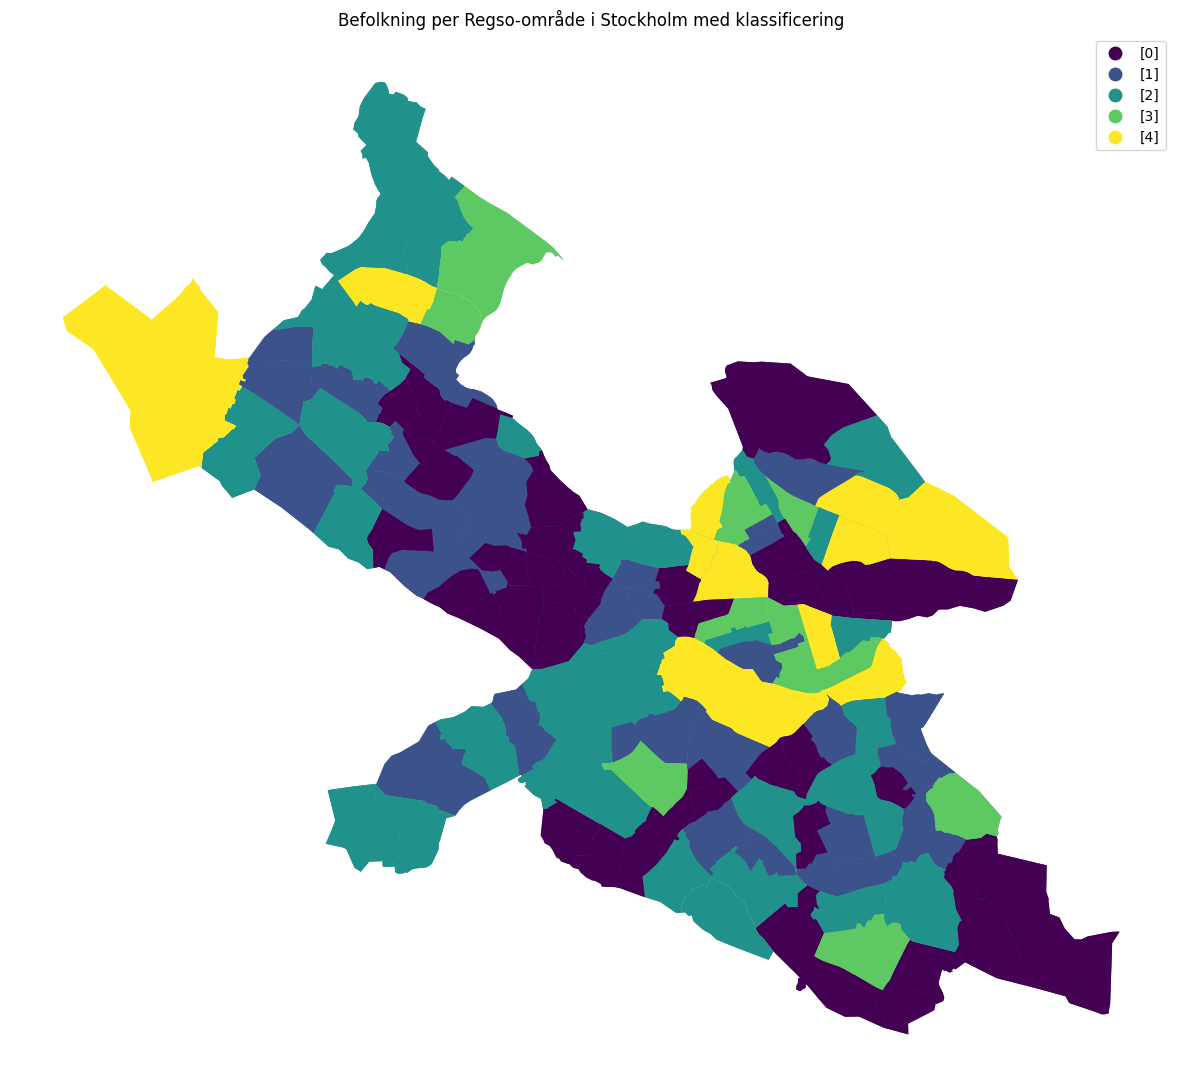

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import mapclassify

def fetch_and_plot_data(url):
    # [Din befintliga kod för att hämta och bearbeta data...]
    return df

def create_population_map(gdf, df):
    # Sammanfoga geodata med befolkningsdata baserat på 'region'
    merged_gdf = gdf.merge(df, left_on='regsokod', right_on='region', how='inner')

    # Kontrollera om det finns tillräckligt med unika värden för klassificering
    if len(merged_gdf['Folkmängden per region'].unique()) > 1:
        # Klassificera 'Folkmängden per region' med en metod liknande Jenks
        classifier = mapclassify.NaturalBreaks(y=merged_gdf['Folkmängden per region'], k=5)
        merged_gdf['Folkmängden per klass'] = merged_gdf['Folkmängden per region'].apply(classifier)
        # Konvertera klassresultaten till en sträng för att undvika hash-problem
        merged_gdf['Folkmängden per klass'] = merged_gdf['Folkmängden per klass'].apply(str)
    else:
        # Om det inte finns tillräckligt med unika värden, använd en enkel indelning
        merged_gdf['Folkmängden per klass'] = 'En klass'

    # Skapa en tematisk karta
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    merged_gdf.plot(column='Folkmängden per klass', ax=ax, legend=True, cmap='viridis', categorical=True, legend_kwds={'bbox_to_anchor': (1, 1)})
    ax.set_title('Befolkning per Regso-område i Stockholm med klassificering')
    ax.set_axis_off()
    plt.show()

# URL till datan
url = 'https://www.statistikdatabasen.scb.se/sq/143466'
df = fetch_and_plot_data(url)

# Ladda geodata
gdf = gpd.read_file('/content/sample_data/geodata/RegSO_2018_v2.gpkg')

# Skapa en tematisk karta över Stockholm
create_population_map(gdf, df)



För att skapa en karta som suddar ut de visuella skillnaderna, använde jag "Equal Interval" klassificering. Denna metod delar upp befolkningsdata i intervall där varje klass har samma storleksomfång, oavsett hur datan är fördelad. Det resulterar i en karta där skillnader i befolkningstäthet blir mindre framträdande, och ger ett mer enhetligt och jämnt visuellt intryck.

Jämfört med den föregående kartan, som använde "Natural Breaks" (Jenks) klassificering för att framhäva skillnader och skapa tydliga visuella gränser mellan olika befolkningsnivåer, ger den nya metoden en mindre distinkt bild. Medan den förra metoden betonade områdenas unika befolkningsegenskaper, tenderar den nya metoden att "platta till" och jämna ut det visuella intrycket, vilket gör det svårare att skilja mellan områden med hög och låg befolkningstäthet.

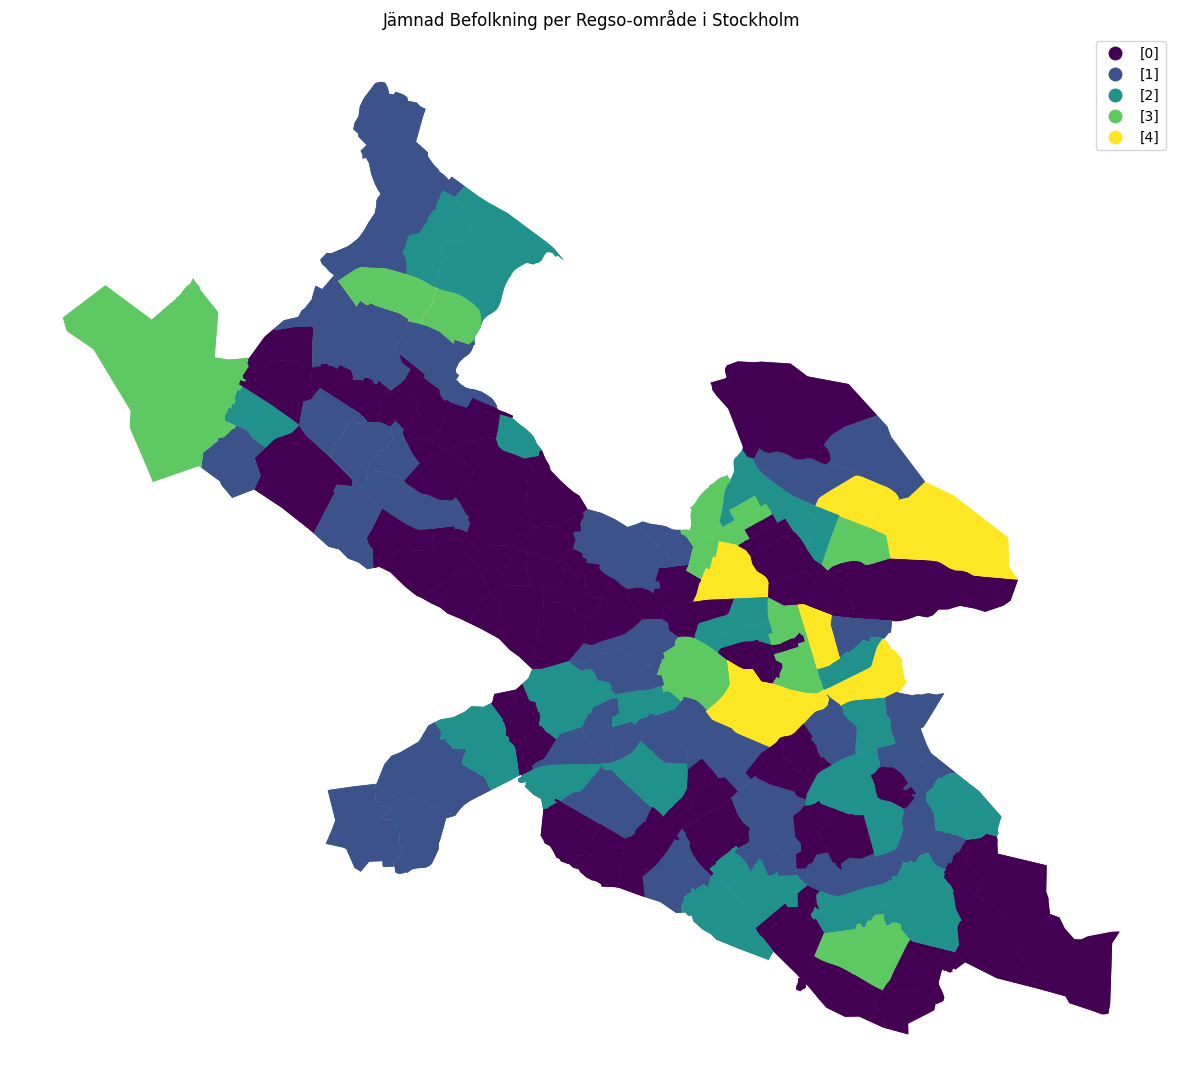

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import mapclassify

def fetch_and_plot_data(url):
    # [Din befintliga kod för att hämta och bearbeta data...]
    return df

def create_flattened_population_map(gdf, df):
    # Sammanfoga geodata med befolkningsdata baserat på 'region'
    merged_gdf = gdf.merge(df, left_on='regsokod', right_on='region', how='inner')

    # Använd 'Equal Interval' klassificering för att jämna ut visuella skillnader
    if len(merged_gdf['Folkmängden per region'].unique()) > 1:
        classifier = mapclassify.EqualInterval(y=merged_gdf['Folkmängden per region'], k=5)
        merged_gdf['Folkmängden per klass'] = merged_gdf['Folkmängden per region'].apply(lambda x: classifier.find_bin(x))
    else:
        merged_gdf['Folkmängden per klass'] = 'En klass'

    # Konvertera klassresultaten till en sträng
    merged_gdf['Folkmängden per klass'] = merged_gdf['Folkmängden per klass'].astype(str)

    # Skapa en tematisk karta
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    merged_gdf.plot(column='Folkmängden per klass', ax=ax, legend=True, cmap='viridis', categorical=True, legend_kwds={'bbox_to_anchor': (1, 1)})
    ax.set_title('Jämnad Befolkning per Regso-område i Stockholm')
    ax.set_axis_off()
    plt.show()

# URL till datan
url = 'https://www.statistikdatabasen.scb.se/sq/143466'
df = fetch_and_plot_data(url)

# Ladda geodata
gdf = gpd.read_file('/content/sample_data/geodata/RegSO_2018_v2.gpkg')

# Skapa en jämnad tematisk karta över Stockholm
create_flattened_population_map(gdf, df)
